1. Linear regression on compactiv excel sheet

In [1161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#linear regression modules
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import statsmodels.api as sm

In [1162]:
comp_data = pd.read_excel('compactiv.xlsx')

In [1163]:
#checking the shape of the dataset.
comp_data.shape

(8192, 22)

There are 8192 rows and 22 columns in the dataset.

In [1164]:
comp_data.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound     4670   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound     7278   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound      702   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound     7248   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound      633   

  freeswap  usr  
0  1730946   95  
1  1869002   97  
2  1021237   87  
3  1863704   98  
4  1760253   90  

[5 rows x 22 columns]

In [1165]:
comp_data.tail()

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  \
8187     16      12   3009    360     244   1.6  5.81  405250.0  85282.0   
8188      4       0   1596    170     146   2.4  1.80   89489.0  41764.0   
8189     16       5   3116    289     190   0.6  0.60  325948.0  52640.0   
8190     32      45   5180    254     179   1.2  1.20   62571.0  29505.0   
8191      2       0    985     55      46   1.6  4.80  111111.0  22256.0   

      pgout  ...  pgscan  atch   pgin  ppgin    pflt    vflt         runqsz  \
8187   8.02  ...   55.11   0.6  35.87  47.90  139.28  270.74      CPU_Bound   
8188   3.80  ...    0.20   0.8   3.80   4.40  122.40  212.60  Not_CPU_Bound   
8189   0.40  ...    0.00   0.4  28.40  45.20   60.20  219.80  Not_CPU_Bound   
8190   1.40  ...   18.04   0.4  23.05  24.25   93.19  202.81      CPU_Bound   
8191   0.00  ...    0.00   0.2   3.40   6.20   91.80  110.00      CPU_Bound   

      freemem freeswap  usr  
8187      387   986647   80  
8188      263  1055742   90  
8189      400   969106   87  
8190      141  1022458   83  
8191      659  1756514   94  

[5 rows x 22 columns]

In [1166]:
comp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

All variables excluding runqsz are numeric (either integer or float variables).
The columns fork, exec, rchar, wchar, pgout, ppgout, pgfree, pgscan, atch, pgin, ppgin, pflt, vflt are numbers from description but all of them are recorded as float. 
This will need further review based on the values in the data to check whether they need to be converted to numbers.

In [1167]:
comp_data.iloc[0,:]

lread               1
lwrite              0
scall            2147
sread              79
swrite             68
fork              0.2
exec              0.2
rchar         40671.0
wchar         53995.0
pgout             0.0
ppgout            0.0
pgfree            0.0
pgscan            0.0
atch              0.0
pgin              1.6
ppgin             2.6
pflt             16.0
vflt             26.4
runqsz      CPU_Bound
freemem          4670
freeswap      1730946
usr                95
Name: 0, dtype: object

In [1168]:
comp_data.describe().T

count          mean            std     min        25%        50%  \
lread     8192.0  1.955969e+01      53.353799     0.0        2.0        7.0   
lwrite    8192.0  1.310620e+01      29.891726     0.0        0.0        1.0   
scall     8192.0  2.306318e+03    1633.617322   109.0     1012.0     2051.5   
sread     8192.0  2.104800e+02     198.980146     6.0       86.0      166.0   
swrite    8192.0  1.500582e+02     160.478980     7.0       63.0      117.0   
fork      8192.0  1.884554e+00       2.479493     0.0        0.4        0.8   
exec      8192.0  2.791998e+00       5.212456     0.0        0.2        1.2   
rchar     8088.0  1.973857e+05  239837.493526   278.0    34091.5   125473.5   
wchar     8177.0  9.590299e+04  140841.707911  1498.0    22916.0    46619.0   
pgout     8192.0  2.285317e+00       5.307038     0.0        0.0        0.0   
ppgout    8192.0  5.977229e+00      15.214590     0.0        0.0        0.0   
pgfree    8192.0  1.191971e+01      32.363520     0.0        0.0        0.0   
pgscan    8192.0  2.152685e+01      71.141340     0.0        0.0        0.0   
atch      8192.0  1.127505e+00       5.708347     0.0        0.0        0.0   
pgin      8192.0  8.277960e+00      13.874978     0.0        0.6        2.8   
ppgin     8192.0  1.238859e+01      22.281318     0.0        0.6        3.8   
pflt      8192.0  1.097938e+02     114.419221     0.0       25.0       63.8   
vflt      8192.0  1.853158e+02     191.000603     0.2       45.4      120.4   
freemem   8192.0  1.763456e+03    2482.104511    55.0      231.0      579.0   
freeswap  8192.0  1.328126e+06  422019.426957     2.0  1042623.5  1289289.5   
usr       8192.0  8.396887e+01      18.401905     0.0       81.0       89.0   

                  75%         max  
lread          20.000     1845.00  
lwrite         10.000      575.00  
scall        3317.250    12493.00  
sread         279.000     5318.00  
swrite        185.000     5456.00  
fork            2.200       20.12  
exec            2.800       59.56  
rchar      267828.750  2526649.00  
wchar      106101.000  1801623.00  
pgout           2.400       81.44  
ppgout          4.200      184.20  
pgfree          5.000      523.00  
pgscan          0.000     1237.00  
atch            0.600      211.58  
pgin            9.765      141.20  
ppgin          13.800      292.61  
pflt          159.600      899.80  
vflt          251.800     1365.00  
freemem      2002.250    12027.00  
freeswap  1730379.500  2243187.00  
usr            94.000       99.00

In [1169]:
#check for null values in rchar column
comp_data.rchar.isnull().sum()

104

In [1170]:
#view the rows having null for rchar
comp_data[~comp_data.rchar.notnull()]

lread  lwrite  scall  sread  swrite  fork  exec  rchar     wchar  pgout  \
2       15       3   2162    159     119   2.0   2.4    NaN   31950.0    0.0   
3        0       0    160     12      16   0.2   0.2    NaN    8670.0    0.0   
4        5       1    330     39      38   0.4   0.4    NaN   12185.0    0.0   
5        0       0   1201     65      61   0.4   0.4    NaN   58703.0    0.0   
6        1       0   5744    168     190   0.2   0.2    NaN  189975.0    6.0   
..     ...     ...    ...    ...     ...   ...   ...    ...       ...    ...   
101     81      80   1086    134      81   0.4   0.4    NaN       NaN    3.6   
102      7       2   2342    125      74   2.2   4.2    NaN       NaN   10.6   
103      1       0    645    120      69   0.4   0.6    NaN       NaN    0.0   
104      3       2   1388     68      49   0.2   0.2    NaN       NaN    0.0   
105     56      59   5526    776     598   6.2   1.6    NaN       NaN    3.8   

     ...  pgscan  atch  pgin  ppgin   pflt   vflt         runqsz  freemem  \
2    ...     0.0   1.2   6.0    9.4  150.2  220.2  Not_CPU_Bound      702   
3    ...     0.0   0.0   0.2    0.2   15.6   16.8  Not_CPU_Bound     7248   
4    ...     0.0   0.0   1.0    1.2   37.8   47.6  Not_CPU_Bound      633   
5    ...     0.0   0.0   0.0    0.0   28.4   34.4  Not_CPU_Bound     6854   
6    ...     0.0   4.4   0.6    0.6   27.4   28.6  Not_CPU_Bound      312   
..   ...     ...   ...   ...    ...    ...    ...            ...      ...   
101  ...    18.2   1.6   2.0    2.2   35.4  102.8  Not_CPU_Bound      129   
102  ...   152.2   1.0  70.0   75.8  146.4  293.2  Not_CPU_Bound      175   
103  ...     0.0   0.6   2.0    3.8   37.2   56.0      CPU_Bound     1092   
104  ...     0.0   0.0   5.4    5.4   16.0   25.4      CPU_Bound     5245   
105  ...     0.0   0.4   3.2    5.4  294.8  454.0      CPU_Bound      292   

    freeswap  usr  
2    1021237   87  
3    1863704   98  
4    1760253   90  
5    1877461   96  
6    1013458   89  
..       ...  ...  
101   991770   92  
102  1058875   85  
103  1728875   94  
104  1675056   96  
105  1545926   72  

[104 rows x 22 columns]

In [1171]:
#check for null values in wchar column
comp_data.wchar.isnull().sum()

15

In [1172]:
#viewing rows having null in wchar column
comp_data[~comp_data.wchar.notnull()]

lread  lwrite  scall  sread  swrite  fork  exec     rchar  wchar  pgout  \
96      14       9   3448    370     261   2.0   2.0       NaN    NaN    5.8   
97      95     120   3749    281     194   1.4   1.2       NaN    NaN    0.0   
98       1       0   1084     91      63   0.2   0.2       NaN    NaN    0.0   
99      37       7   1889    126     126   0.6   0.6       NaN    NaN    5.6   
100     42      47   1476    172     103   2.8   2.8       NaN    NaN    0.0   
101     81      80   1086    134      81   0.4   0.4       NaN    NaN    3.6   
102      7       2   2342    125      74   2.2   4.2       NaN    NaN   10.6   
103      1       0    645    120      69   0.4   0.6       NaN    NaN    0.0   
104      3       2   1388     68      49   0.2   0.2       NaN    NaN    0.0   
105     56      59   5526    776     598   6.2   1.6       NaN    NaN    3.8   
106      1       0   3294    271     172   1.0   2.6  569257.0    NaN    4.0   
107      1       1    214     17      30   0.2   0.2    7359.0    NaN    0.0   
108      6       0   3816    367     232   4.2   3.4  680520.0    NaN    0.0   
109      0       0    168     12      14   0.2   0.2    1081.0    NaN    0.0   
110    145       3   4928    178     118   0.6   1.2    8260.0    NaN    0.0   

     ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
96   ...    74.8   3.8   5.2   16.6  130.60  235.60      CPU_Bound      158   
97   ...     0.0   0.4  11.0   11.0   68.80  225.60      CPU_Bound     1428   
98   ...     0.0   0.0   1.4    1.8   32.60   25.20      CPU_Bound      622   
99   ...   287.4   1.8  25.8   41.2   62.80  217.40  Not_CPU_Bound      238   
100  ...     0.0   0.0   1.4    2.4  172.40  256.00      CPU_Bound     1426   
101  ...    18.2   1.6   2.0    2.2   35.40  102.80  Not_CPU_Bound      129   
102  ...   152.2   1.0  70.0   75.8  146.40  293.20  Not_CPU_Bound      175   
103  ...     0.0   0.6   2.0    3.8   37.20   56.00      CPU_Bound     1092   
104  ...     0.0   0.0   5.4    5.4   16.00   25.40      CPU_Bound     5245   
105  ...     0.0   0.4   3.2    5.4  294.80  454.00      CPU_Bound      292   
106  ...     0.0   2.4  17.6   20.0   90.80  222.60  Not_CPU_Bound      369   
107  ...     0.0   0.0   0.0    0.0   15.63   17.84  Not_CPU_Bound     7309   
108  ...     0.0   0.0  22.6   24.2  177.00  317.80      CPU_Bound     1305   
109  ...     0.0   0.0   0.0    0.0   17.00   16.80  Not_CPU_Bound     8307   
110  ...     0.0   0.0  63.2   63.4   49.20   61.00      CPU_Bound      537   

    freeswap  usr  
96   1026549   82  
97   1307952   86  
98   1016328   95  
99   1064165   88  
100  1070854   86  
101   991770   92  
102  1058875   85  
103  1728875   94  
104  1675056   96  
105  1545926   72  
106  1017470   85  
107  1869372   97  
108  1043736   81  
109  1863622   97  
110  1517352   86  

[15 rows x 22 columns]

In [1173]:
comp_data.duplicated().sum()

0

In [1174]:
#unique value counts for runqsz which is a categorical column
comp_data.runqsz.value_counts()

Not_CPU_Bound    4331
CPU_Bound        3861
Name: runqsz, dtype: int64

### Univariate analysis

In [1175]:
#boxplots for all numeric and float datatypes
comp_data_numeric = comp_data.select_dtypes(exclude = 'object')

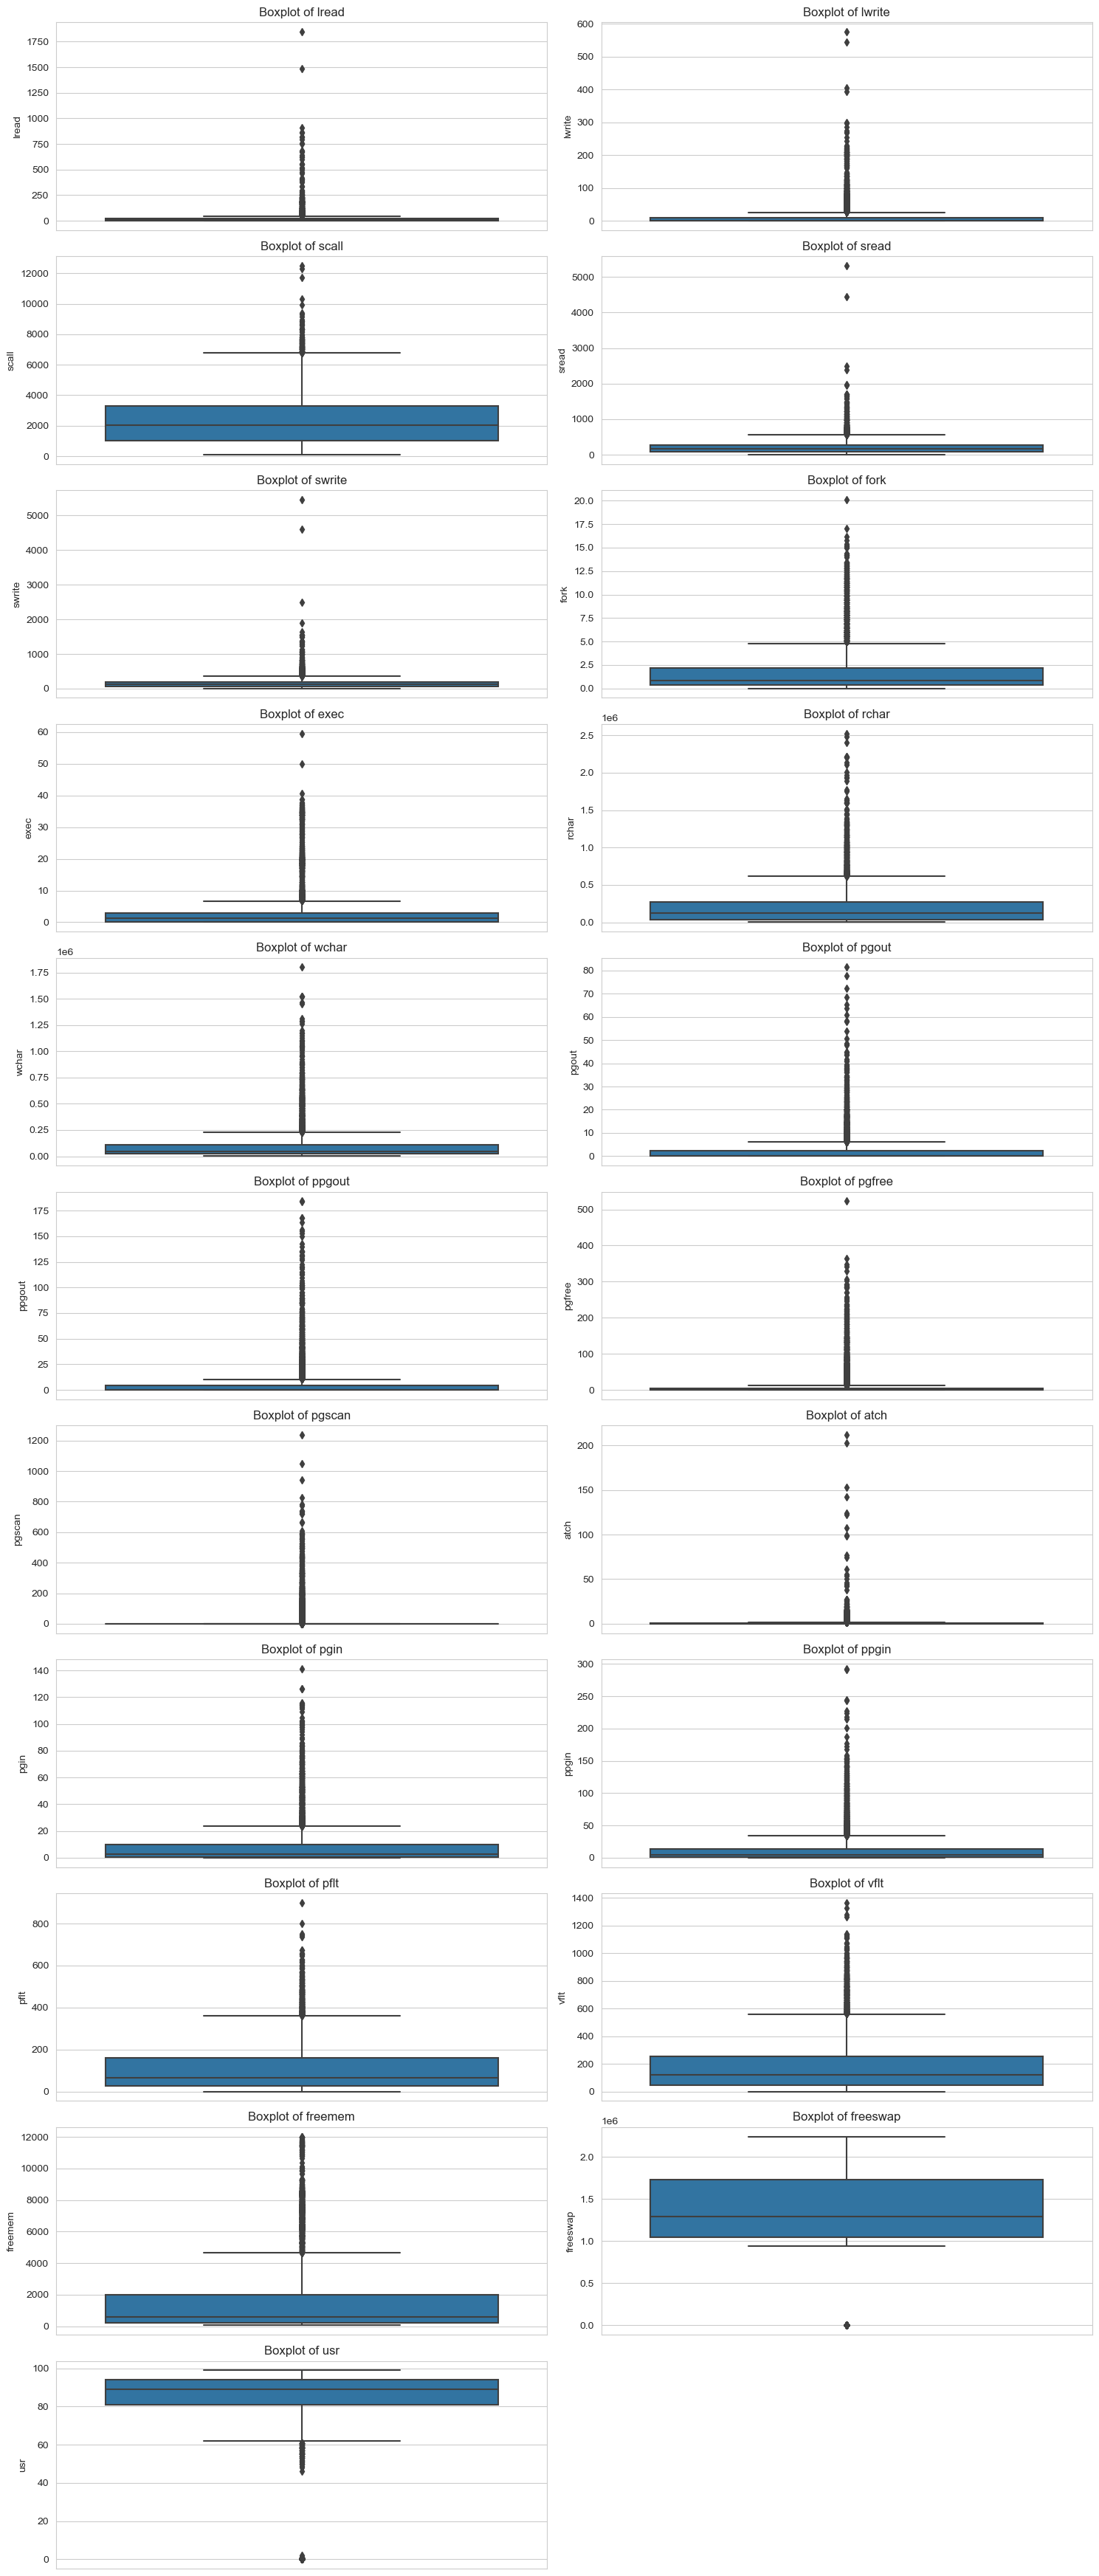

In [1176]:
plt.figure(figsize = (15,35))
feature_list = comp_data_numeric.columns
for i in range(len(feature_list)):
    plt.subplot(11, 2, i + 1)
    sns.boxplot(y = comp_data_numeric[feature_list[i]], data = comp_data_numeric)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

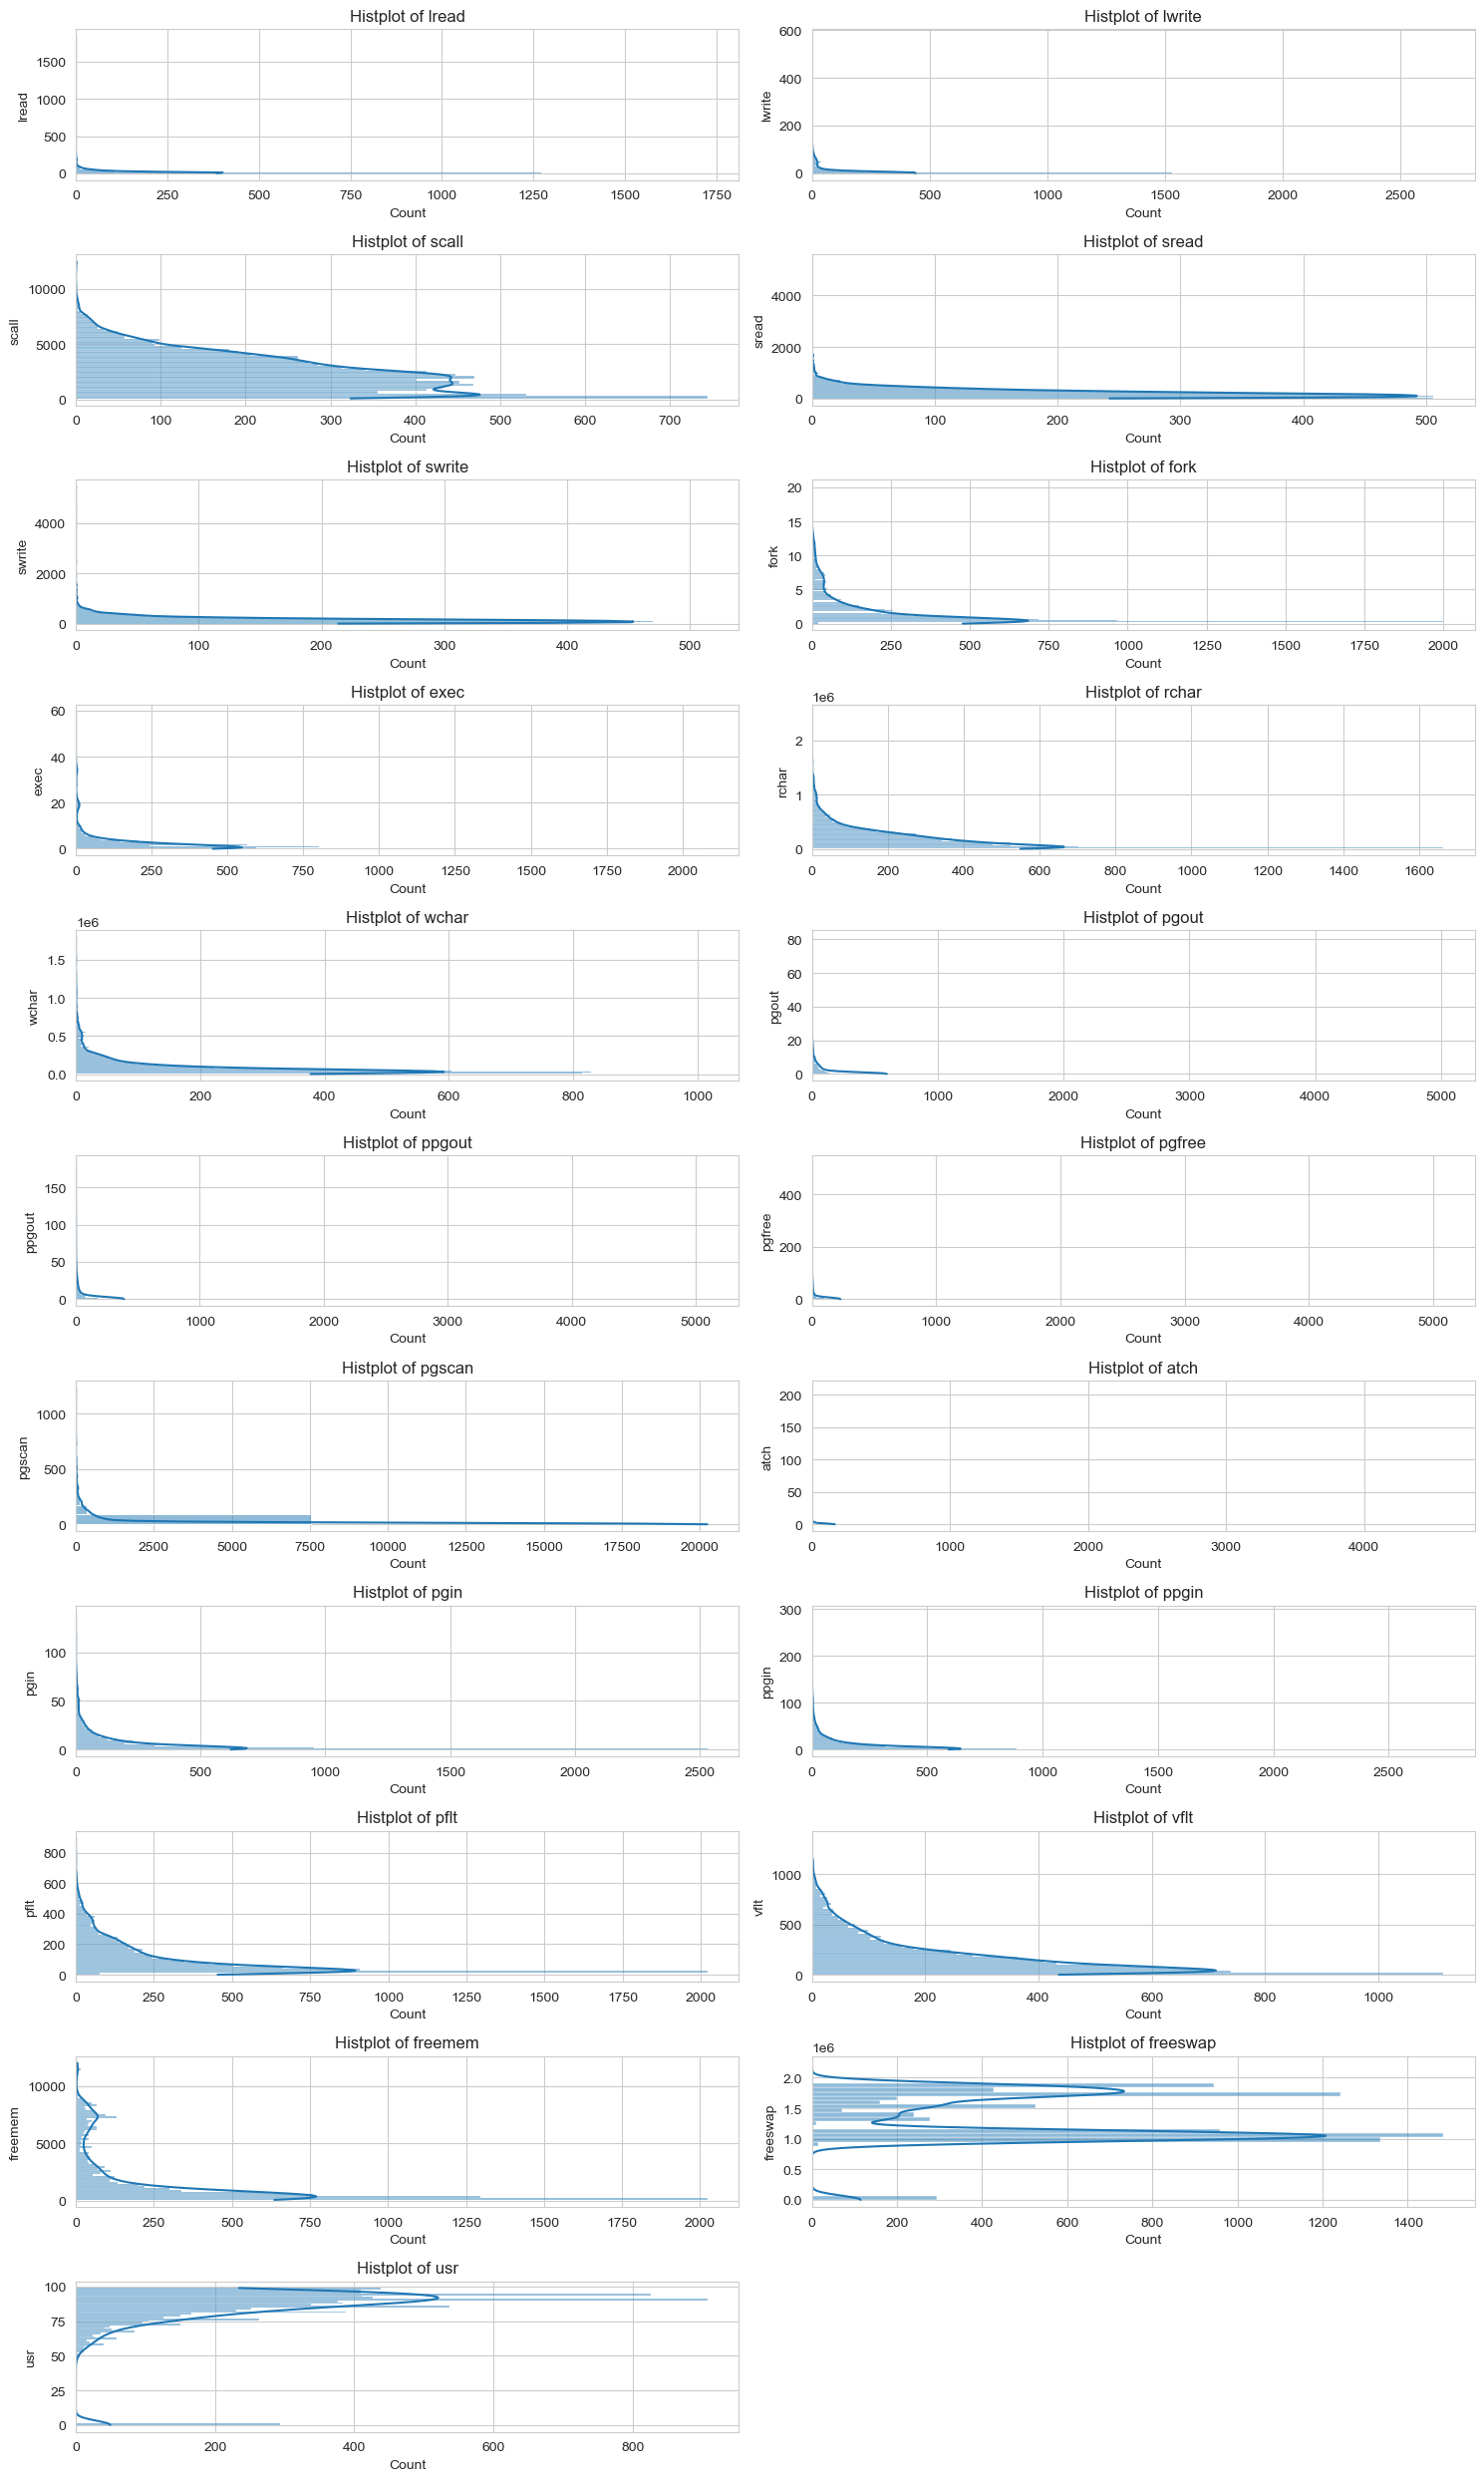

In [1177]:
plt.figure(figsize = (15,25))
feature_list = comp_data_numeric.columns
for i in range(len(feature_list)):
    plt.subplot(11, 2, i + 1)
    sns.histplot(y = comp_data_numeric[feature_list[i]], data = comp_data_numeric, kde = True)
    plt.title('Histplot of {}'.format(feature_list[i]))
    plt.tight_layout()

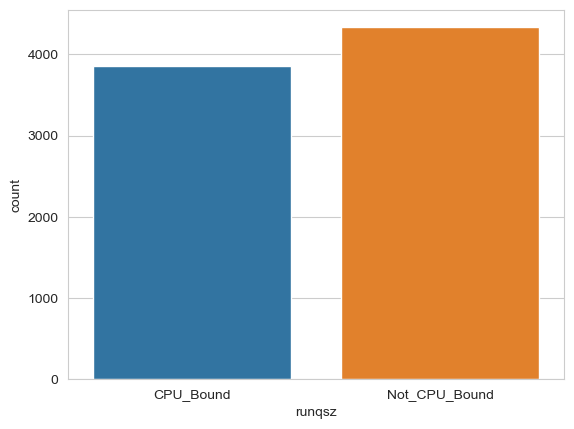

In [1178]:
sns.countplot(x = 'runqsz', data = comp_data);

### bivariate analysis

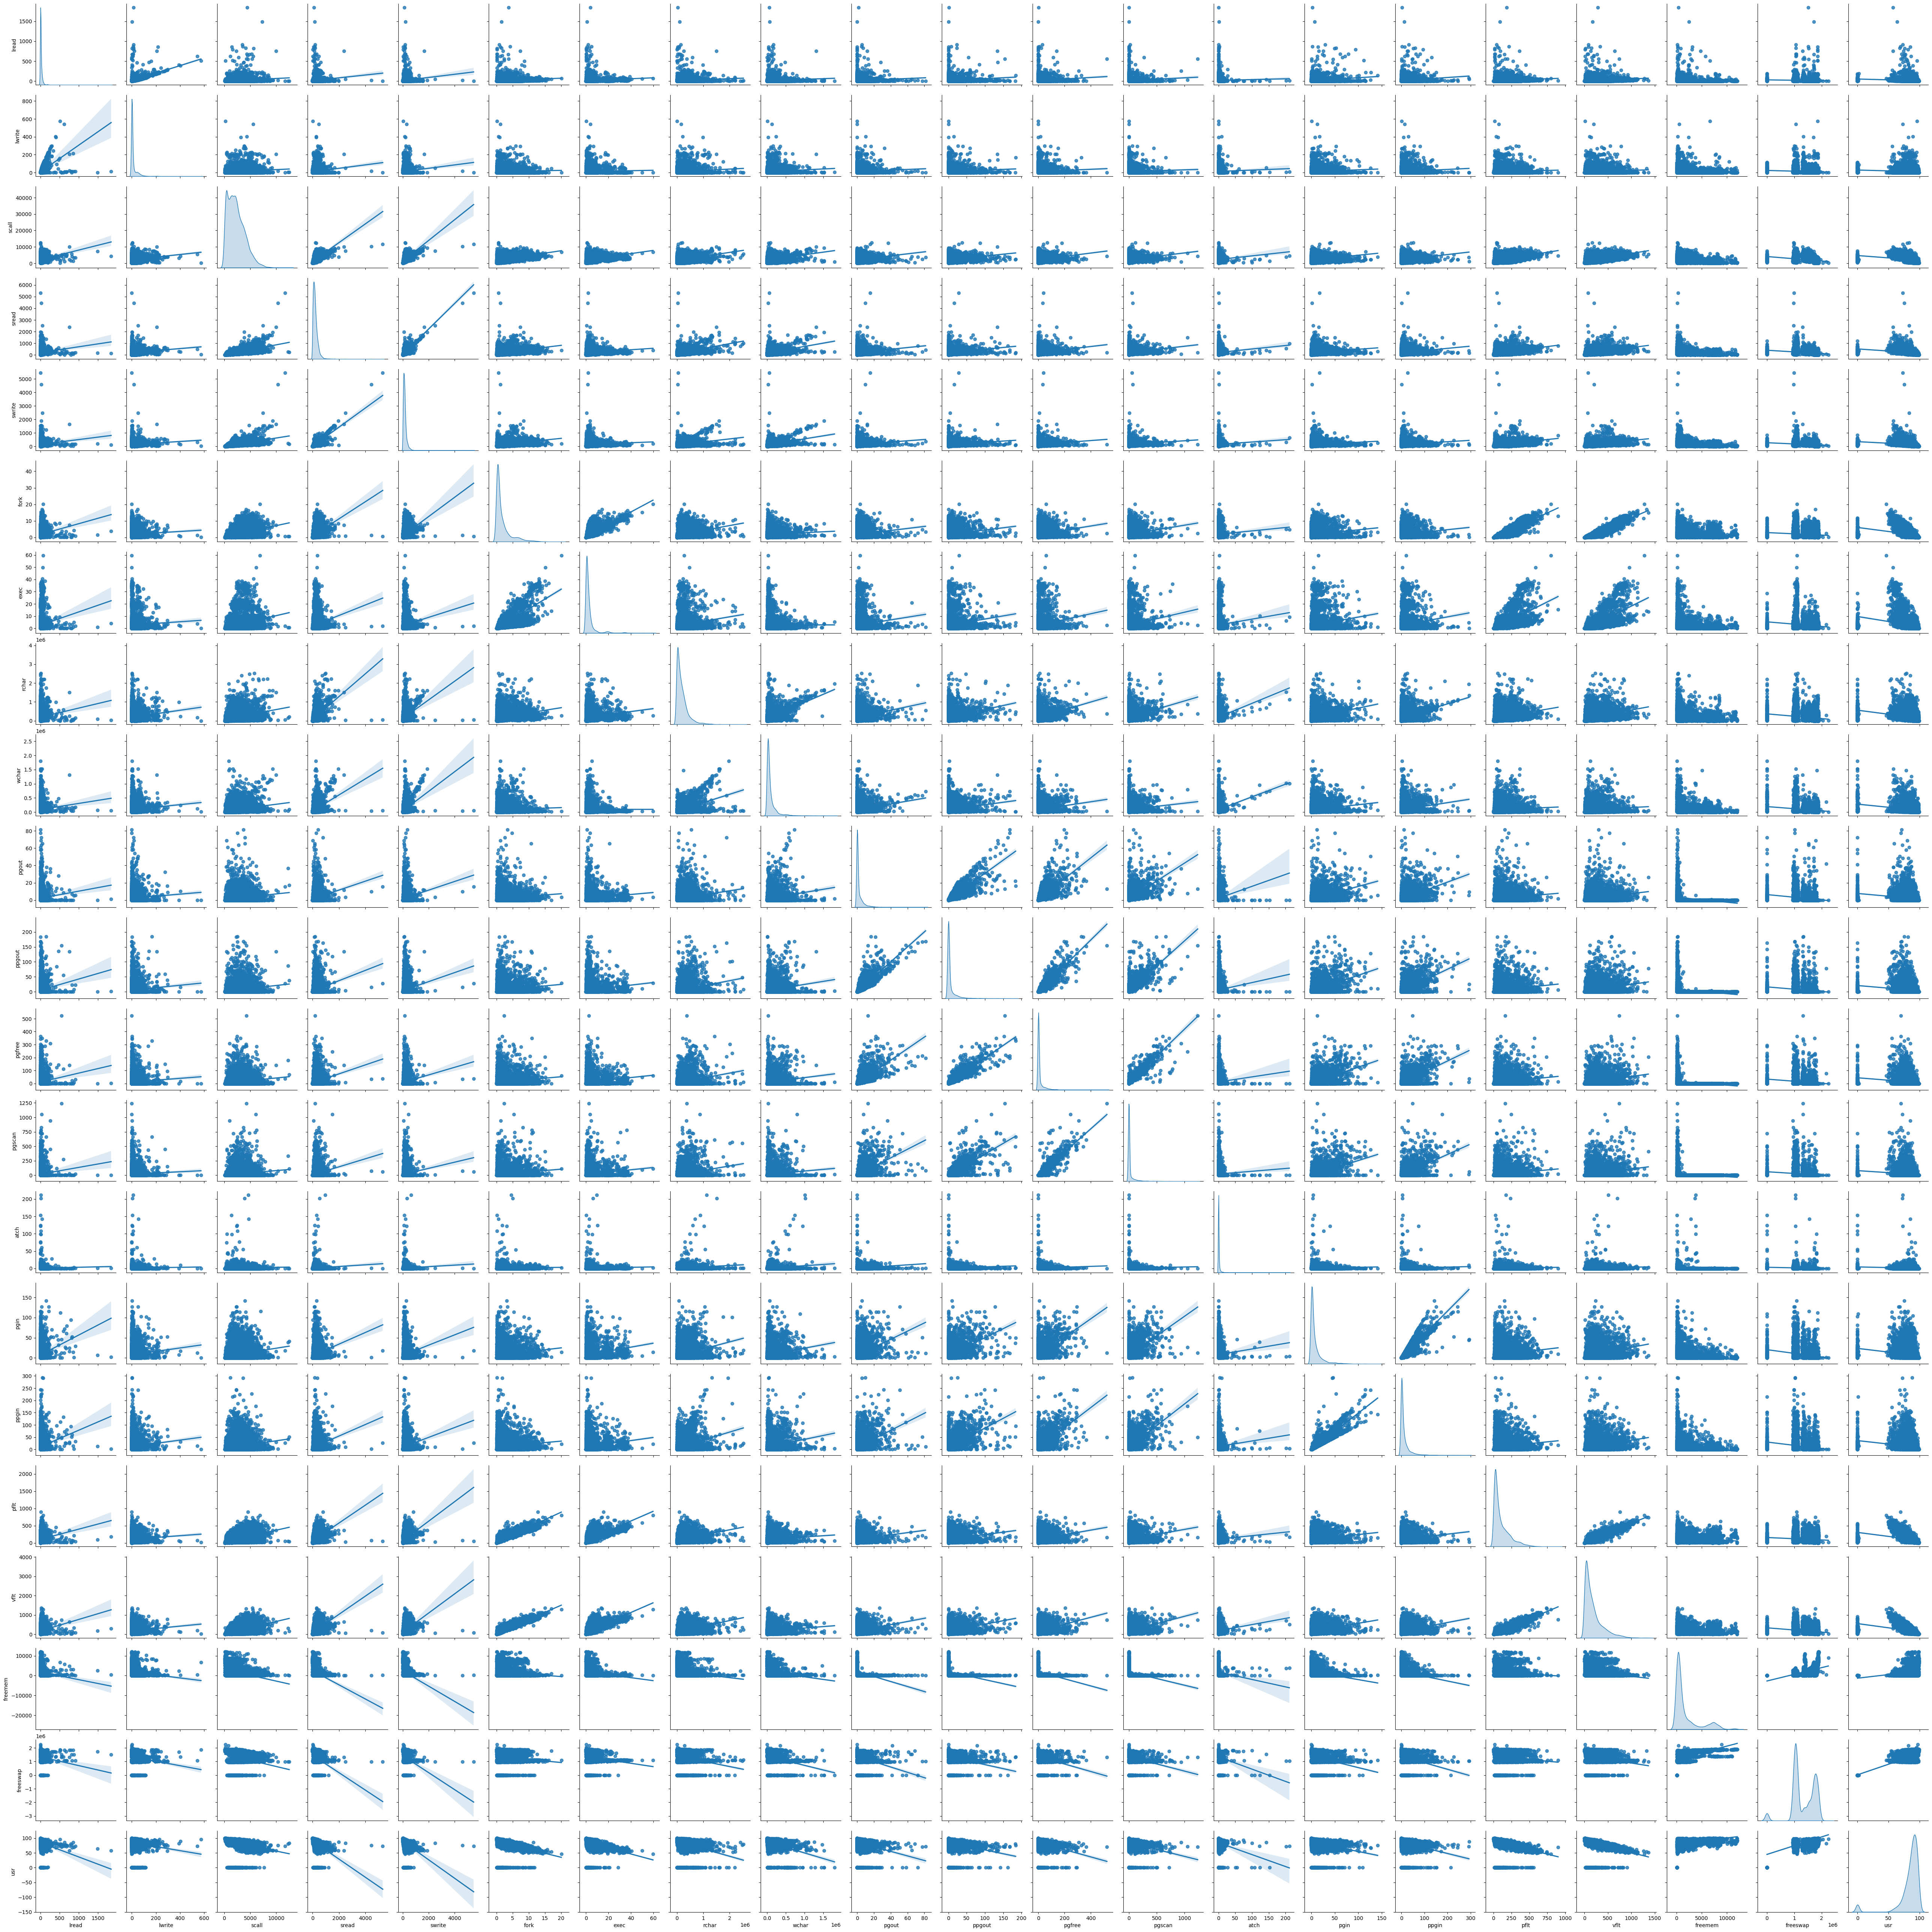

In [280]:
#plt.figure(figsize = (20,20))
#pairplot of all numeric columns with regression line visualization
sns.pairplot(data = comp_data_numeric, kind='reg', diag_kind = 'kde')

<AxesSubplot:>

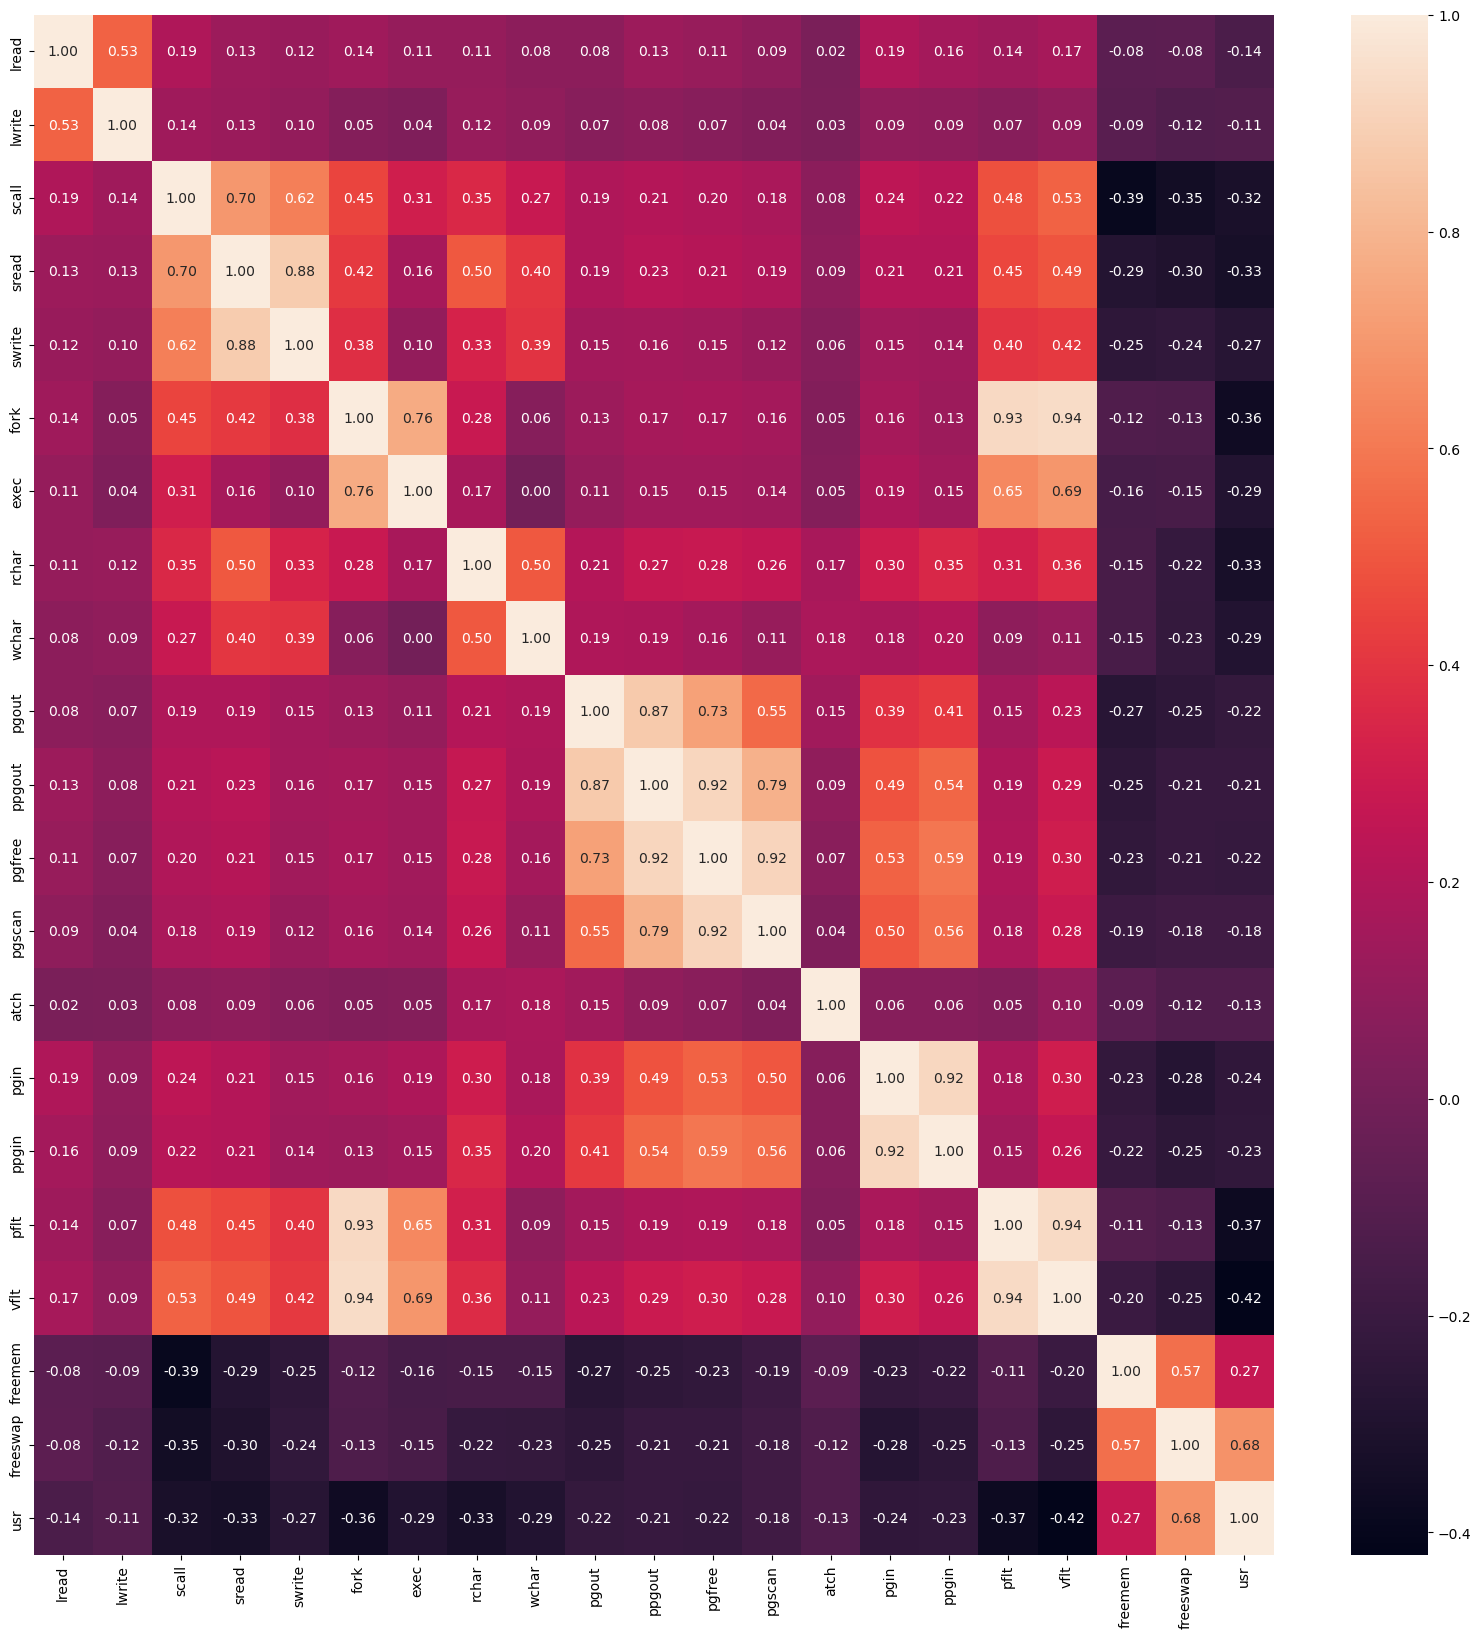

In [281]:
#correlation map for all numeric columns
plt.figure(figsize = (20,20))
corr = comp_data_numeric.corr()
sns.heatmap(corr, annot = True, fmt = '.2f')

In [1179]:
#x<= -0.25 and x>=0.25
#usr variable has high correlation with scall, sread, swrite, fork, exec, rchar, wchar, pflt, vflt, freemem, freeswap
# run linear regression only with these variables in second variant of linear regression model.

In [1180]:
#boxplot with hue of runsqz on all numeric variables

<AxesSubplot:xlabel='runqsz', ylabel='usr'>

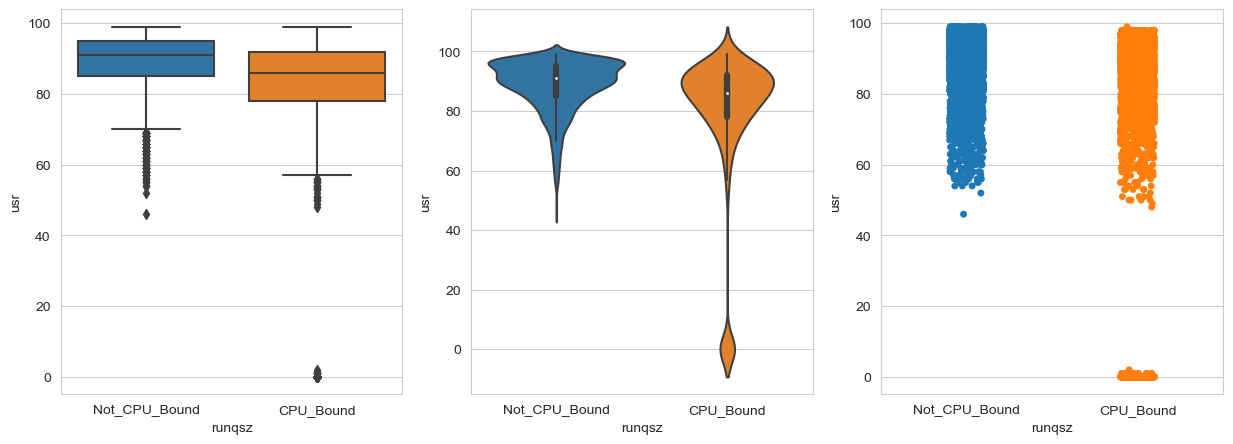

In [1181]:
x = 'runqsz'
y = 'usr'

#boxplot, violin plot, stripplot of all categorical variables with numeric variable.
order=comp_data[x].value_counts().index
plt.figure(figsize= (15,5))
plt.subplot(1,3,1)
sns.boxplot(x=comp_data[x], y=comp_data[y], data=comp_data, order=order)
plt.subplot(1,3,2)
sns.violinplot(x=comp_data[x], y=comp_data[y], data=comp_data, order=order)
plt.subplot(1,3,3)
sns.stripplot(x=comp_data[x], y=comp_data[y], data=comp_data, order=order)

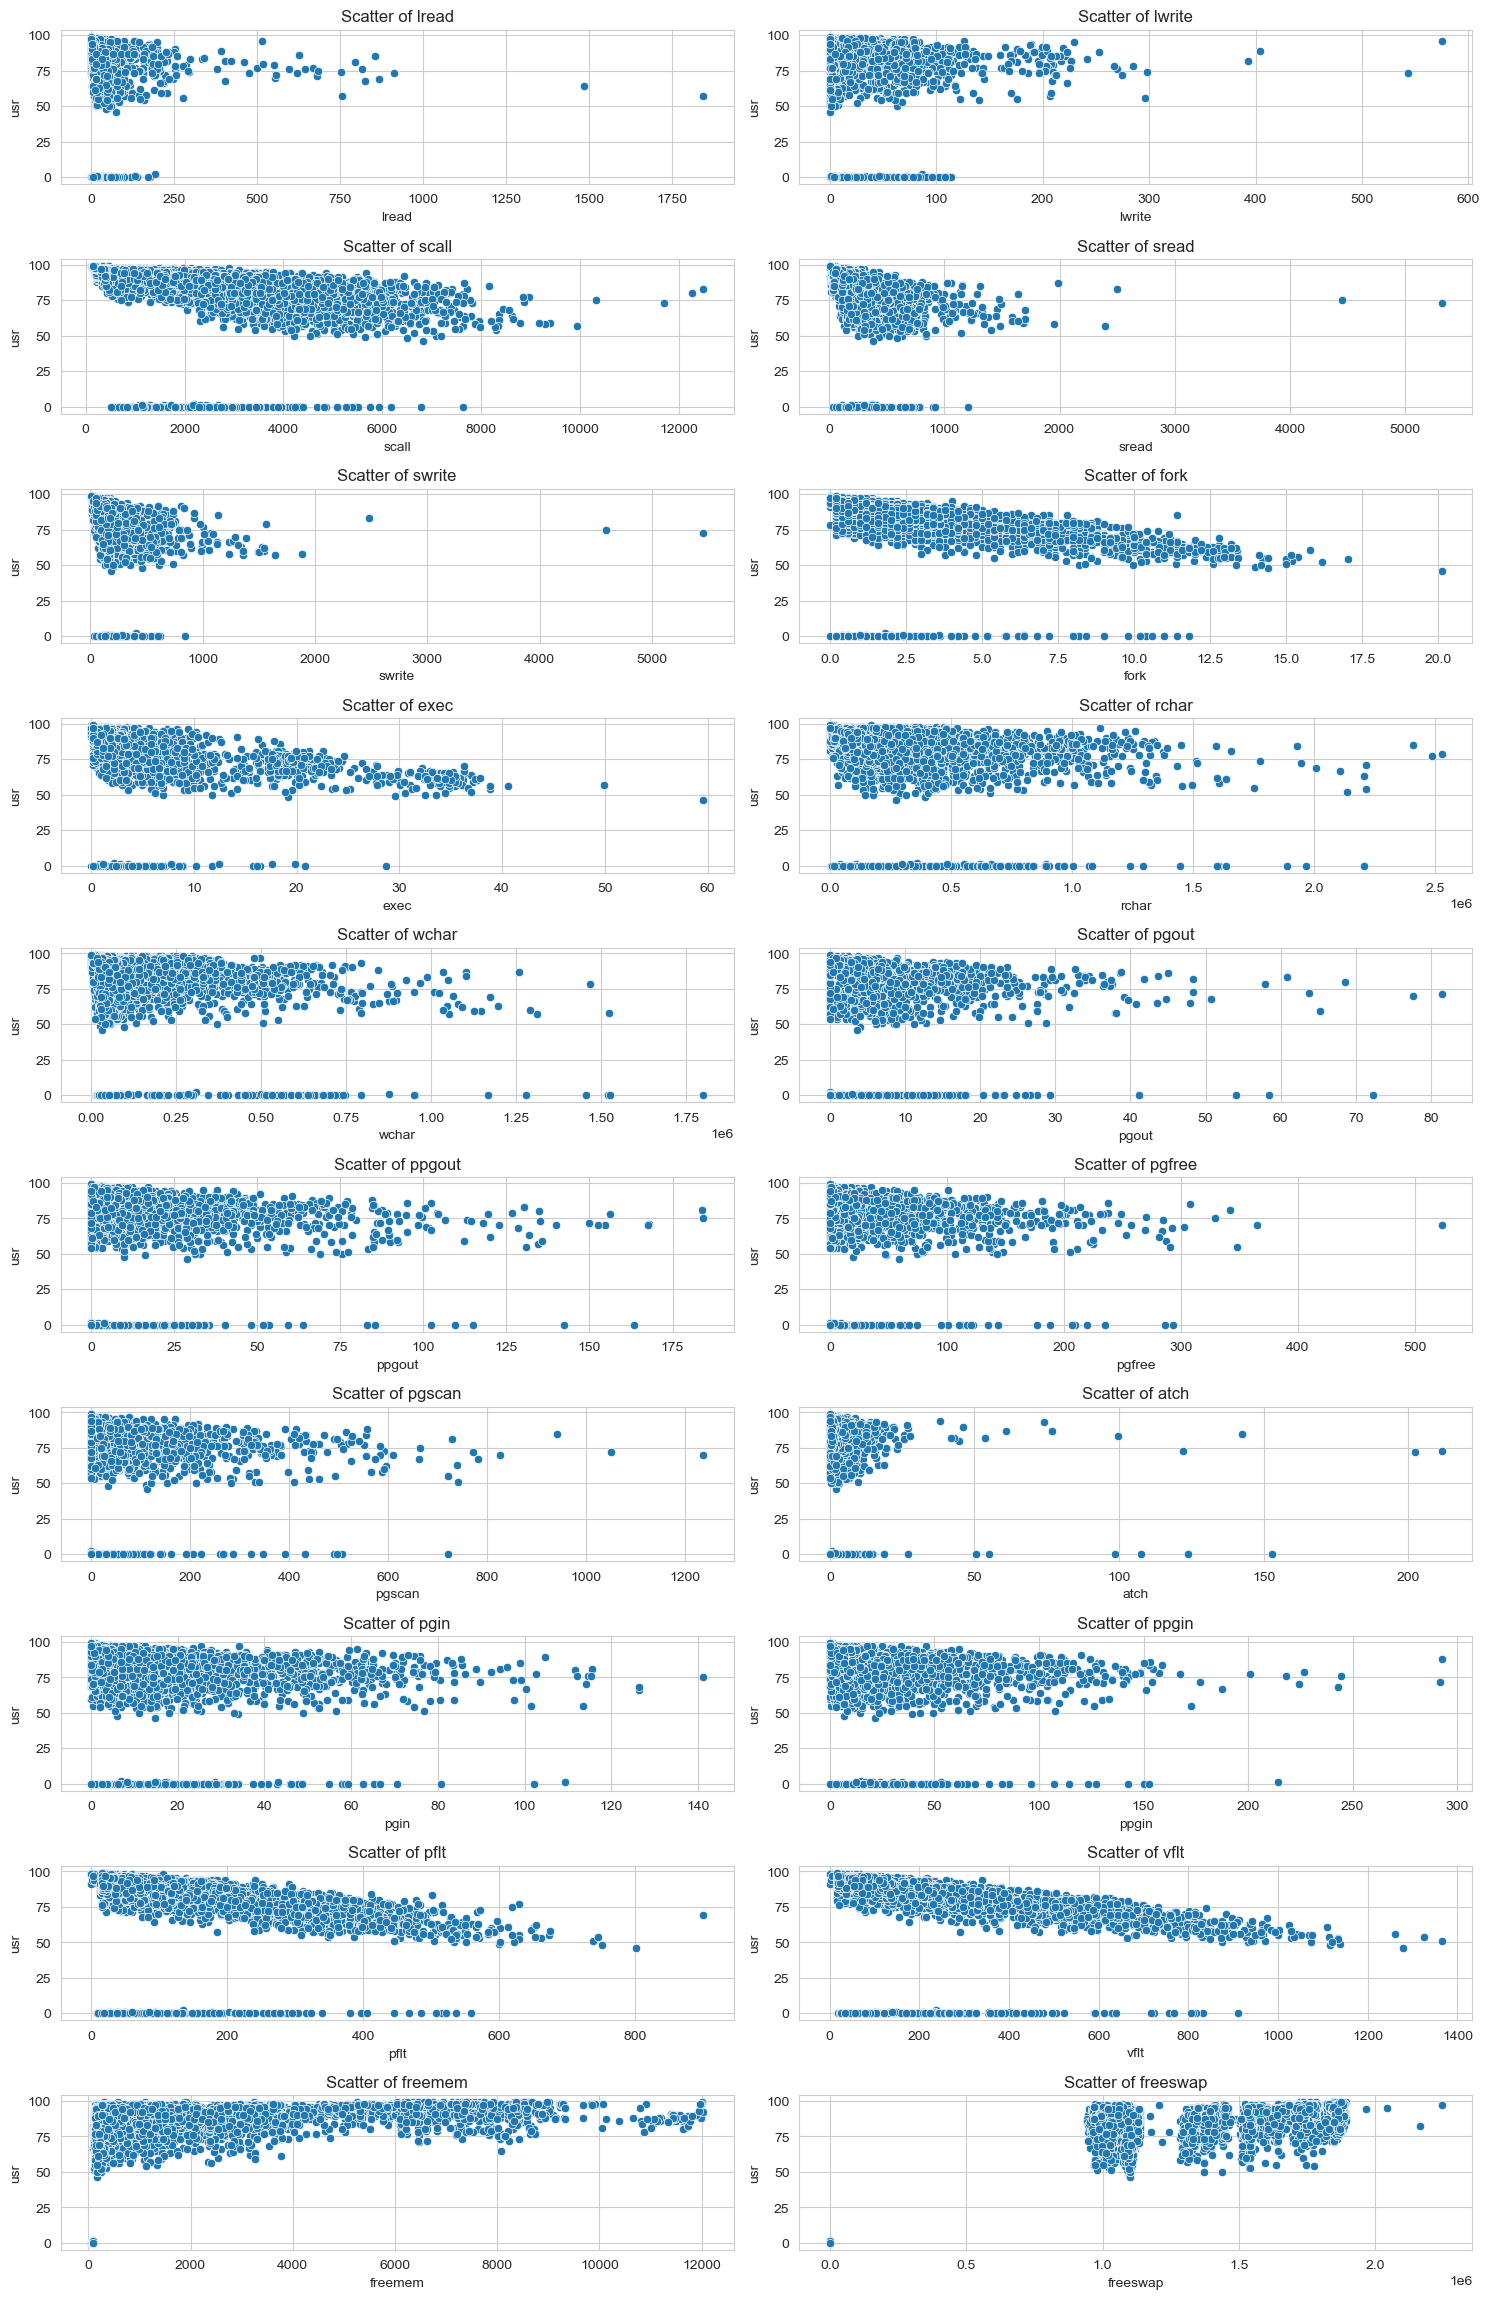

In [1182]:
#pair plot of all independent variables with dependent variable
plt.figure(figsize = (15,25))
#remove price column from comp_data_numeric
comp_data_independent_column_names = comp_data_numeric.columns.drop('usr')
feature_list = comp_data_independent_column_names
for i in range(len(feature_list)):
    plt.subplot(11, 2, i + 1)
    sns.scatterplot(x = comp_data_numeric[feature_list[i]], y = 'usr', data = comp_data_numeric)
    plt.title('Scatter of {}'.format(feature_list[i]))
    plt.tight_layout()
    plt.xlabel(feature_list[i])
    plt.ylabel('usr')

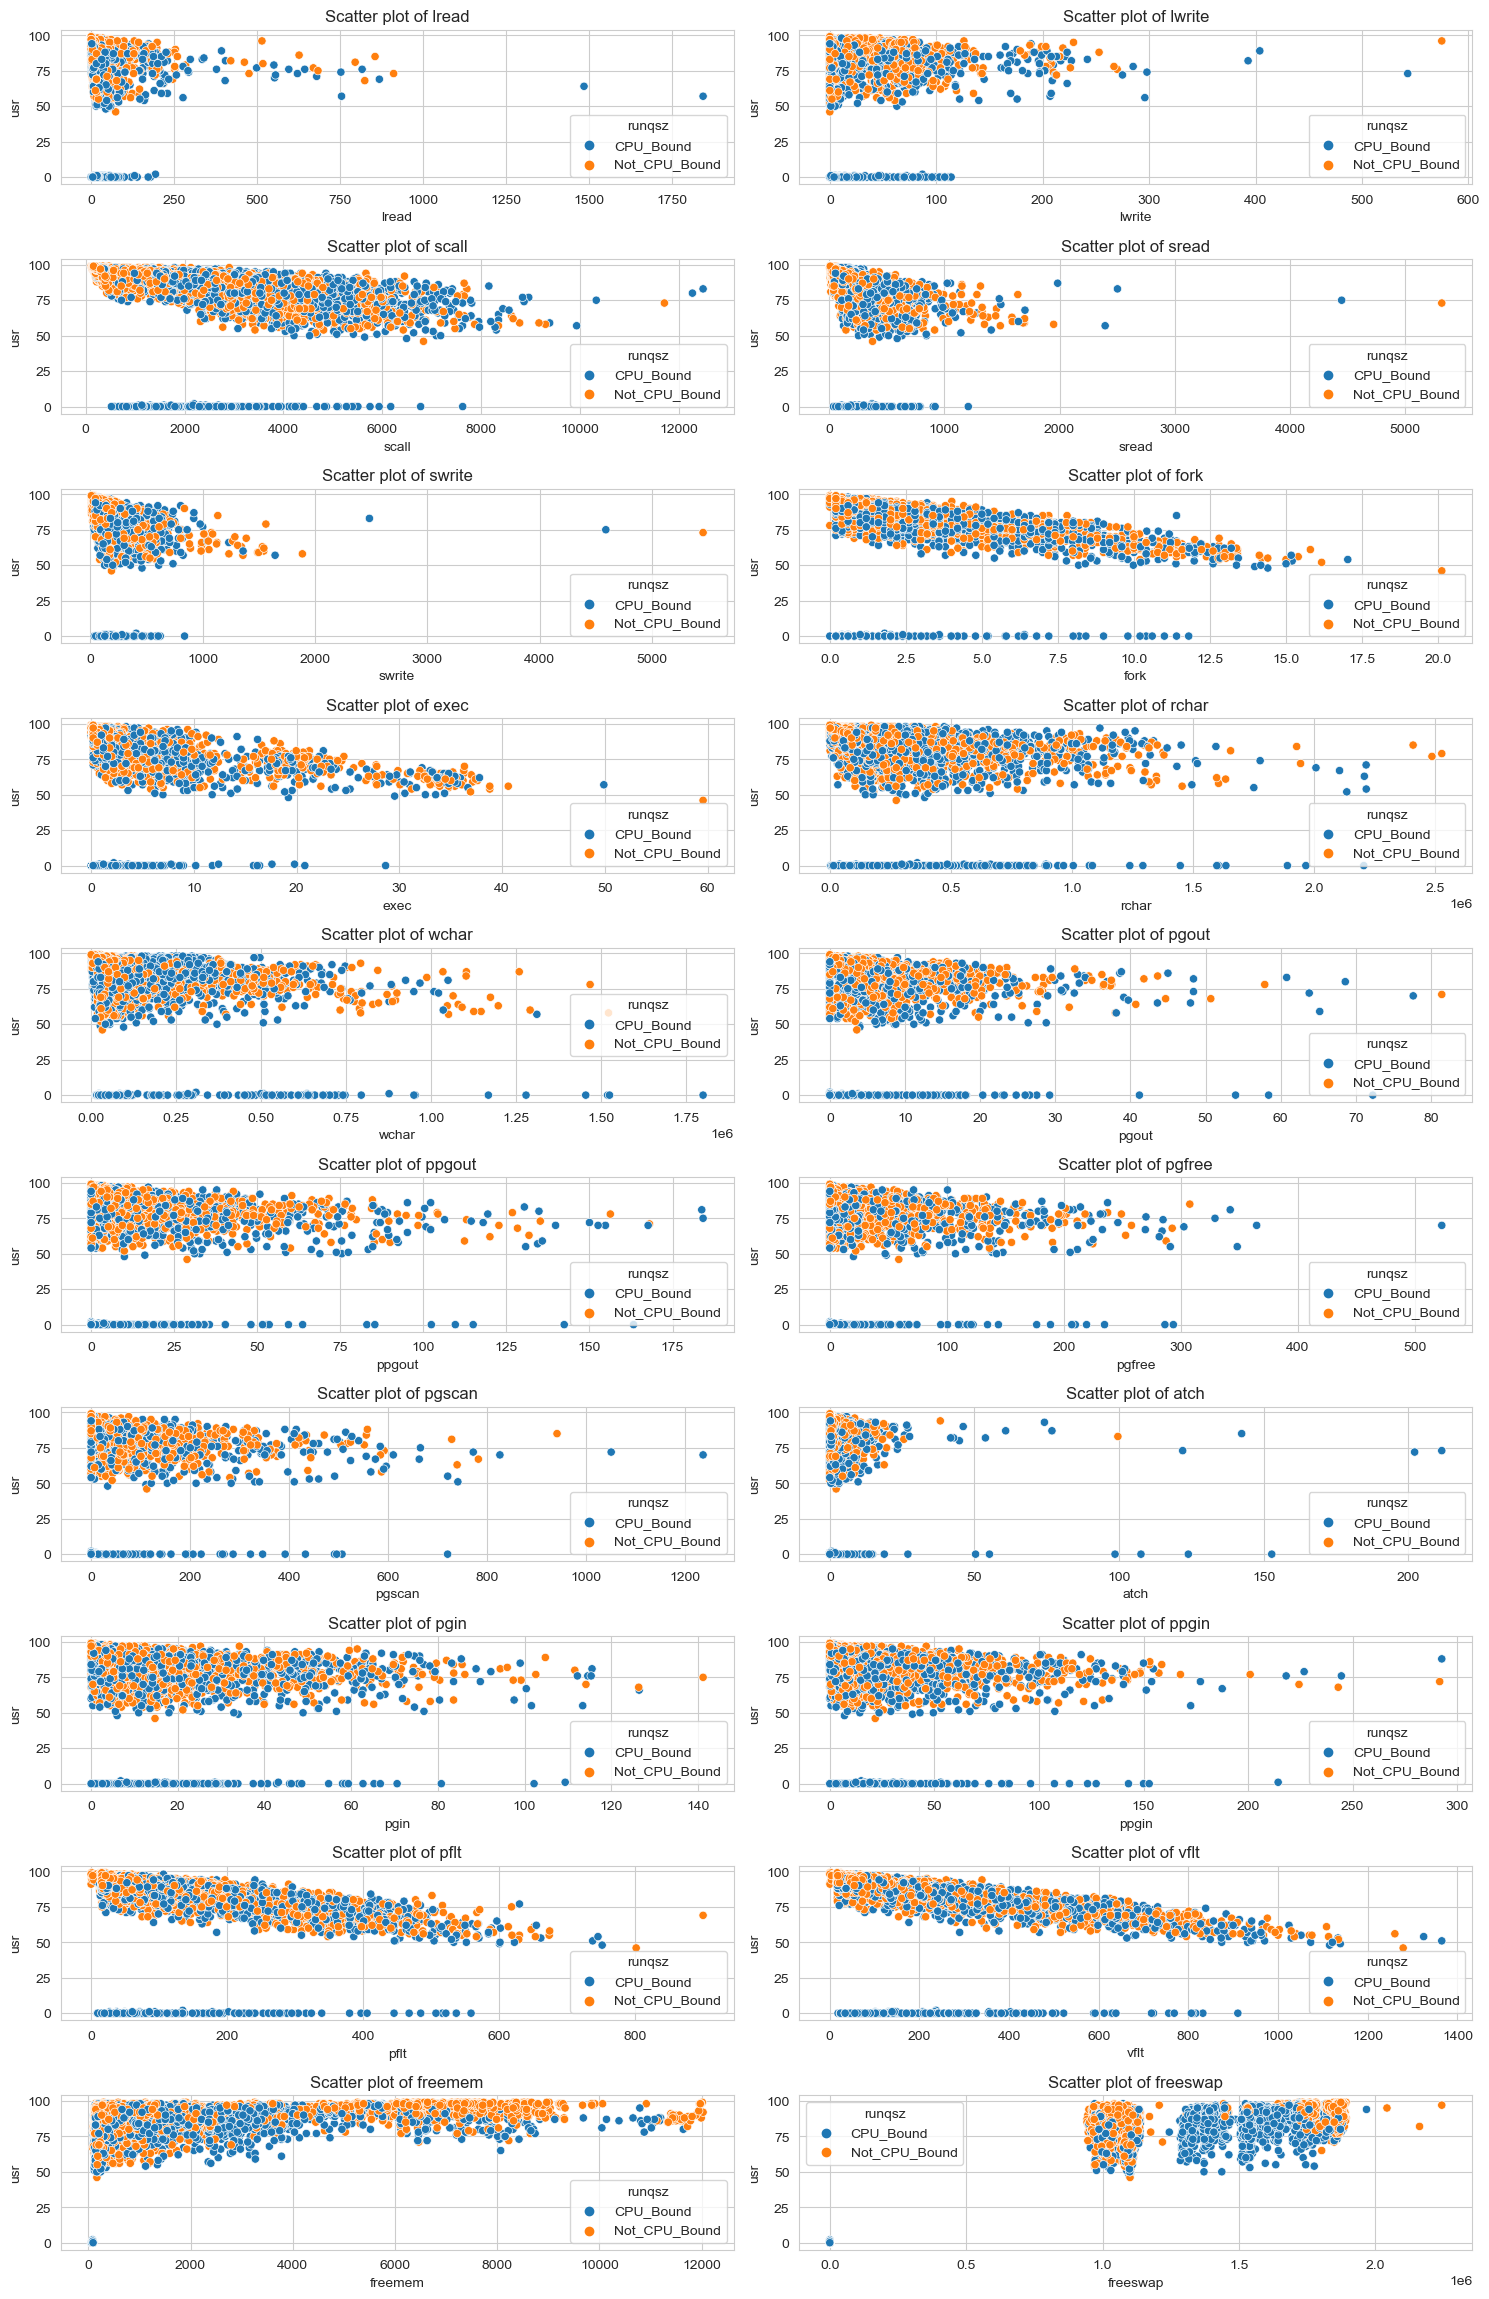

In [1183]:
#multivariate analysis

#pair plot of all independent variables with dependent variable and hue 'runqsz'
plt.figure(figsize = (15,25))
#remove price column from comp_data_numeric
comp_data_independent_column_names = comp_data_numeric.columns.drop('usr')
feature_list = comp_data_independent_column_names
for i in range(len(feature_list)):
    plt.subplot(11, 2, i + 1)
    sns.scatterplot(x = comp_data_numeric[feature_list[i]], y = 'usr', data = comp_data, hue = 'runqsz')
    plt.title('Scatter plot of {}'.format(feature_list[i]))
    plt.tight_layout()
    plt.xlabel(feature_list[i])
    plt.ylabel('usr')

Qn2:
    
2A. Impute null values if present, 

2B.also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? 

2C. Check for the possibility of creating new features if required. Also check for outliers and duplicates if there.

2A.
#imputed null values with mean in above step as they make sense

according to column definitions,
sread - Number of system read calls per second .
swrite - Number of system write calls per second .
rchar - Number of characters transferred per second by system read calls
wchar - Number of characters transfreed per second by system write calls

As the number of system read and write calls is not zero in the missing value cases and most of the sread and swrite calls we cannot assume that the number of characters transferred per second by these calls to be zero.

Hence, imputing the missing values of rchar and wchar values with the mean values of their respective columns.

In [1184]:
#2a impute null values if present

#retaining the original data frame, comp_data_processed is the new dataframe that will have processed data and used for regression
comp_data_processed = comp_data.copy()
#check for null values
null_values = [[i, comp_data_processed[i].isnull().sum()] for i in comp_data_processed.columns if comp_data_processed[i].isnull().sum() > 0]
print(null_values)

[['rchar', 104], ['wchar', 15]]


In [1185]:
#there are 104 null values in rchar and 15 null values in wchar

In [1186]:
#viewing the data of the records that have wchar and rchar to understand how to impute null values.

In [1187]:
#viewing rows having null in wchar column
comp_data_processed[~comp_data_processed.wchar.notnull()]

lread  lwrite  scall  sread  swrite  fork  exec     rchar  wchar  pgout  \
96      14       9   3448    370     261   2.0   2.0       NaN    NaN    5.8   
97      95     120   3749    281     194   1.4   1.2       NaN    NaN    0.0   
98       1       0   1084     91      63   0.2   0.2       NaN    NaN    0.0   
99      37       7   1889    126     126   0.6   0.6       NaN    NaN    5.6   
100     42      47   1476    172     103   2.8   2.8       NaN    NaN    0.0   
101     81      80   1086    134      81   0.4   0.4       NaN    NaN    3.6   
102      7       2   2342    125      74   2.2   4.2       NaN    NaN   10.6   
103      1       0    645    120      69   0.4   0.6       NaN    NaN    0.0   
104      3       2   1388     68      49   0.2   0.2       NaN    NaN    0.0   
105     56      59   5526    776     598   6.2   1.6       NaN    NaN    3.8   
106      1       0   3294    271     172   1.0   2.6  569257.0    NaN    4.0   
107      1       1    214     17      30   0.2   0.2    7359.0    NaN    0.0   
108      6       0   3816    367     232   4.2   3.4  680520.0    NaN    0.0   
109      0       0    168     12      14   0.2   0.2    1081.0    NaN    0.0   
110    145       3   4928    178     118   0.6   1.2    8260.0    NaN    0.0   

     ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
96   ...    74.8   3.8   5.2   16.6  130.60  235.60      CPU_Bound      158   
97   ...     0.0   0.4  11.0   11.0   68.80  225.60      CPU_Bound     1428   
98   ...     0.0   0.0   1.4    1.8   32.60   25.20      CPU_Bound      622   
99   ...   287.4   1.8  25.8   41.2   62.80  217.40  Not_CPU_Bound      238   
100  ...     0.0   0.0   1.4    2.4  172.40  256.00      CPU_Bound     1426   
101  ...    18.2   1.6   2.0    2.2   35.40  102.80  Not_CPU_Bound      129   
102  ...   152.2   1.0  70.0   75.8  146.40  293.20  Not_CPU_Bound      175   
103  ...     0.0   0.6   2.0    3.8   37.20   56.00      CPU_Bound     1092   
104  ...     0.0   0.0   5.4    5.4   16.00   25.40      CPU_Bound     5245   
105  ...     0.0   0.4   3.2    5.4  294.80  454.00      CPU_Bound      292   
106  ...     0.0   2.4  17.6   20.0   90.80  222.60  Not_CPU_Bound      369   
107  ...     0.0   0.0   0.0    0.0   15.63   17.84  Not_CPU_Bound     7309   
108  ...     0.0   0.0  22.6   24.2  177.00  317.80      CPU_Bound     1305   
109  ...     0.0   0.0   0.0    0.0   17.00   16.80  Not_CPU_Bound     8307   
110  ...     0.0   0.0  63.2   63.4   49.20   61.00      CPU_Bound      537   

    freeswap  usr  
96   1026549   82  
97   1307952   86  
98   1016328   95  
99   1064165   88  
100  1070854   86  
101   991770   92  
102  1058875   85  
103  1728875   94  
104  1675056   96  
105  1545926   72  
106  1017470   85  
107  1869372   97  
108  1043736   81  
109  1863622   97  
110  1517352   86  

[15 rows x 22 columns]

In [1188]:
#imputing the null values in rchar and wchar columns with mean as they are number of characters transferred per second by system read/write calls.

In [1189]:
comp_data_processed[['rchar', 'wchar']] = comp_data_processed[['rchar', 'wchar']].fillna(round(comp_data_processed[['rchar', 'wchar']].mean(),2))

In [1190]:
#viewing rows having null in wchar column
comp_data_processed[~comp_data_processed.wchar.notnull()]

Empty DataFrame
Columns: [lread, lwrite, scall, sread, swrite, fork, exec, rchar, wchar, pgout, ppgout, pgfree, pgscan, atch, pgin, ppgin, pflt, vflt, runqsz, freemem, freeswap, usr]
Index: []

[0 rows x 22 columns]

In [1191]:
#check for 0s in all numeric columns
comp_data_numeric = comp_data_processed.select_dtypes(exclude = 'object')
for i in comp_data_numeric.columns:
    print("Count of zeros for ",i, "is ",(comp_data_numeric[i] == 0).sum())

Count of zeros for  lread is  675
Count of zeros for  lwrite is  2684
Count of zeros for  scall is  0
Count of zeros for  sread is  0
Count of zeros for  swrite is  0
Count of zeros for  fork is  21
Count of zeros for  exec is  21
Count of zeros for  rchar is  0
Count of zeros for  wchar is  0
Count of zeros for  pgout is  4878
Count of zeros for  ppgout is  4878
Count of zeros for  pgfree is  4869
Count of zeros for  pgscan is  6448
Count of zeros for  atch is  4575
Count of zeros for  pgin is  1220
Count of zeros for  ppgin is  1220
Count of zeros for  pflt is  3
Count of zeros for  vflt is  0
Count of zeros for  freemem is  0
Count of zeros for  freeswap is  0
Count of zeros for  usr is  283


In [1192]:
#pgscan has large count of zeroes which may not contribute much to linear regression and it can be removed.
#also it has less amount of correlation with target variable.

In [1193]:
#almost half of pgout and ppgout also have 0s in their values
#atch variable has more 0s in the column.

#pgscan - 
#pgscan has large count of zeroes which may not contribute much to linear regression and it can be removed.
#also it has less amount of correlation with target variable.


#pgout -
#number of pageout requests per second.
#also it has less correlation with target variable.

#ppgout -
#number of pages paged out per second
#also it has less correlation with target variable.


#atch - 
#number of page attaches per second
#also has less correlation with target variable.

In [1194]:
#creating a new dataframe for feature engineered, outlier treated and scaled data.
comp_data_new = comp_data_processed.copy()
comp_data_fe = comp_data_processed.copy()
comp_data_new.head()

lread  lwrite  scall  sread  swrite  fork  exec      rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2   40671.00  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2     448.00   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4  197385.73  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2  197385.73   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4  197385.73  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound     4670   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound     7278   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound      702   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound     7248   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound      633   

  freeswap  usr  
0  1730946   95  
1  1869002   97  
2  1021237   87  
3  1863704   98  
4  1760253   90  

[5 rows x 22 columns]

In [1195]:
comp_data_new.runqsz.value_counts()

Not_CPU_Bound    4331
CPU_Bound        3861
Name: runqsz, dtype: int64

In [1196]:
# dropping columns that have more than half number of zeroes in the feature engineered dataset.

comp_data_fe.drop(['pgscan','atch', 'pgout', 'ppgout', 'pgfree'], axis =1 , inplace = True)
comp_data_fe.head()

lread  lwrite  scall  sread  swrite  fork  exec      rchar    wchar  pgin  \
0      1       0   2147     79      68   0.2   0.2   40671.00  53995.0   1.6   
1      0       0    170     18      21   0.2   0.2     448.00   8385.0   0.0   
2     15       3   2162    159     119   2.0   2.4  197385.73  31950.0   6.0   
3      0       0    160     12      16   0.2   0.2  197385.73   8670.0   0.2   
4      5       1    330     39      38   0.4   0.4  197385.73  12185.0   1.0   

   ppgin    pflt    vflt         runqsz  freemem  freeswap  usr  
0    2.6   16.00   26.40      CPU_Bound     4670   1730946   95  
1    0.0   15.63   16.83  Not_CPU_Bound     7278   1869002   97  
2    9.4  150.20  220.20  Not_CPU_Bound      702   1021237   87  
3    0.2   15.60   16.80  Not_CPU_Bound     7248   1863704   98  
4    1.2   37.80   47.60  Not_CPU_Bound      633   1760253   90

In [1197]:
#check for possibility of creating new features if required.

#srwcalls = sread + swrite, drop sread, swrite
#total pagefaults = pflt + vflt, drop pflt, vflt

In [1198]:
comp_data_fe['srwcalls'] = comp_data_fe['sread'] + comp_data_fe['swrite']

In [1199]:
comp_data_fe['total_page_faults'] = comp_data_fe['pflt'] + comp_data_fe['vflt']

In [1200]:
comp_data_fe.drop(['sread', 'swrite', 'pflt', 'vflt'], axis = 1, inplace = True)

In [1201]:
comp_data_fe.head()

lread  lwrite  scall  fork  exec      rchar    wchar  pgin  ppgin  \
0      1       0   2147   0.2   0.2   40671.00  53995.0   1.6    2.6   
1      0       0    170   0.2   0.2     448.00   8385.0   0.0    0.0   
2     15       3   2162   2.0   2.4  197385.73  31950.0   6.0    9.4   
3      0       0    160   0.2   0.2  197385.73   8670.0   0.2    0.2   
4      5       1    330   0.4   0.4  197385.73  12185.0   1.0    1.2   

          runqsz  freemem  freeswap  usr  srwcalls  total_page_faults  
0      CPU_Bound     4670   1730946   95       147              42.40  
1  Not_CPU_Bound     7278   1869002   97        39              32.46  
2  Not_CPU_Bound      702   1021237   87       278             370.40  
3  Not_CPU_Bound     7248   1863704   98        28              32.40  
4  Not_CPU_Bound      633   1760253   90        77              85.40

<AxesSubplot:xlabel='srwcalls', ylabel='usr'>

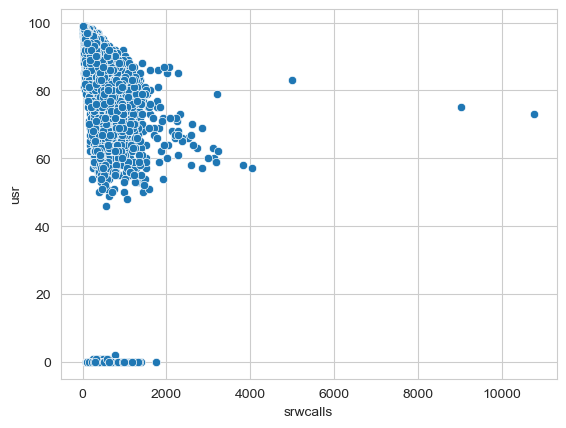

In [1202]:
sns.scatterplot(x = 'srwcalls', y = 'usr', data = comp_data_fe)

In [1203]:
#adding ltransfers columns is not muh correlated with usr
comp_data_fe.srwcalls.corr(comp_data_new.usr)

-0.31480701593236604

<AxesSubplot:xlabel='total_page_faults', ylabel='usr'>

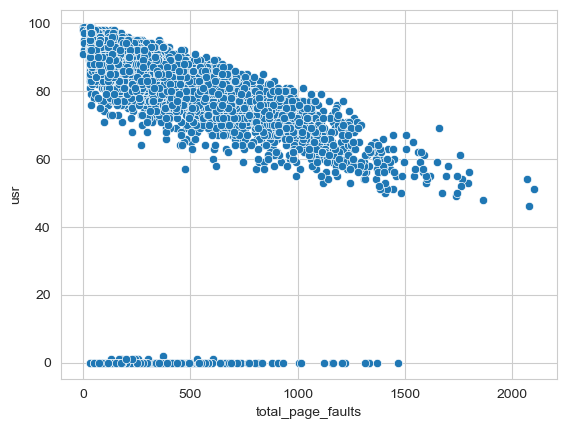

In [1204]:
sns.scatterplot(x = 'total_page_faults', y = 'usr', data = comp_data_fe)

In [1205]:
comp_data_fe.total_page_faults.corr(comp_data_new.usr)

-0.40887032465163525

In [1206]:
#check for outliers, create a new dataframe with treated outliers.

comp_ot = comp_data_new.copy()
comp_data_fe_ot = comp_data_fe.copy()

In [1207]:
comp_ot.runqsz

0           CPU_Bound
1       Not_CPU_Bound
2       Not_CPU_Bound
3       Not_CPU_Bound
4       Not_CPU_Bound
            ...      
8187        CPU_Bound
8188    Not_CPU_Bound
8189    Not_CPU_Bound
8190        CPU_Bound
8191        CPU_Bound
Name: runqsz, Length: 8192, dtype: object

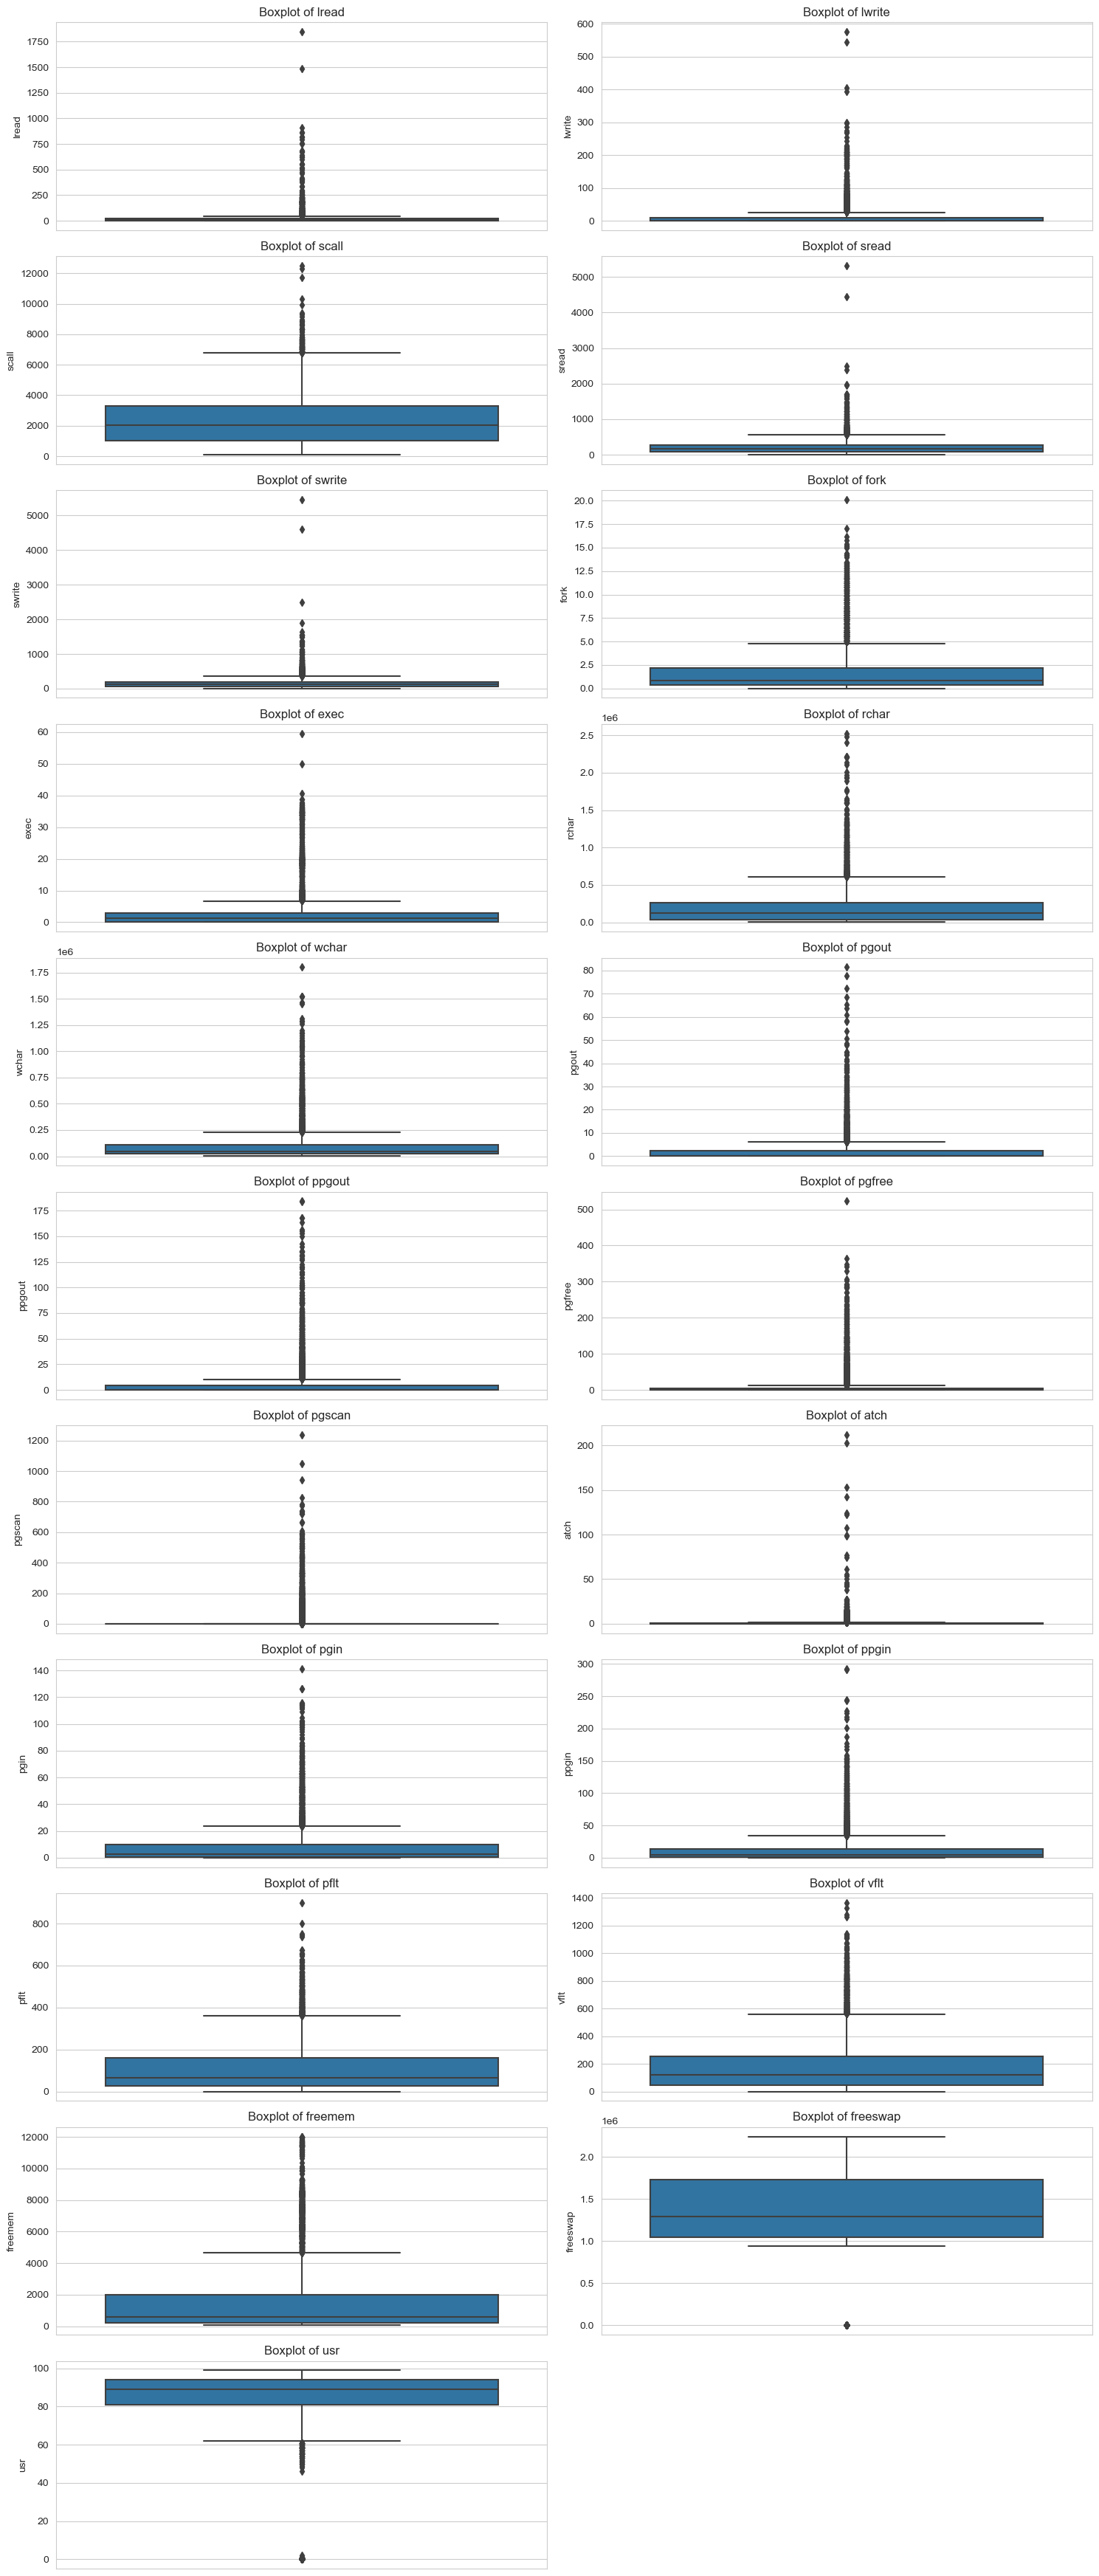

In [1208]:
plt.figure(figsize = (15,35))
feature_list = comp_ot.select_dtypes(exclude = 'object').columns
for i in range(len(feature_list)):
    plt.subplot(11, 2, i + 1)
    sns.boxplot(y = comp_ot[feature_list[i]], data = comp_ot)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

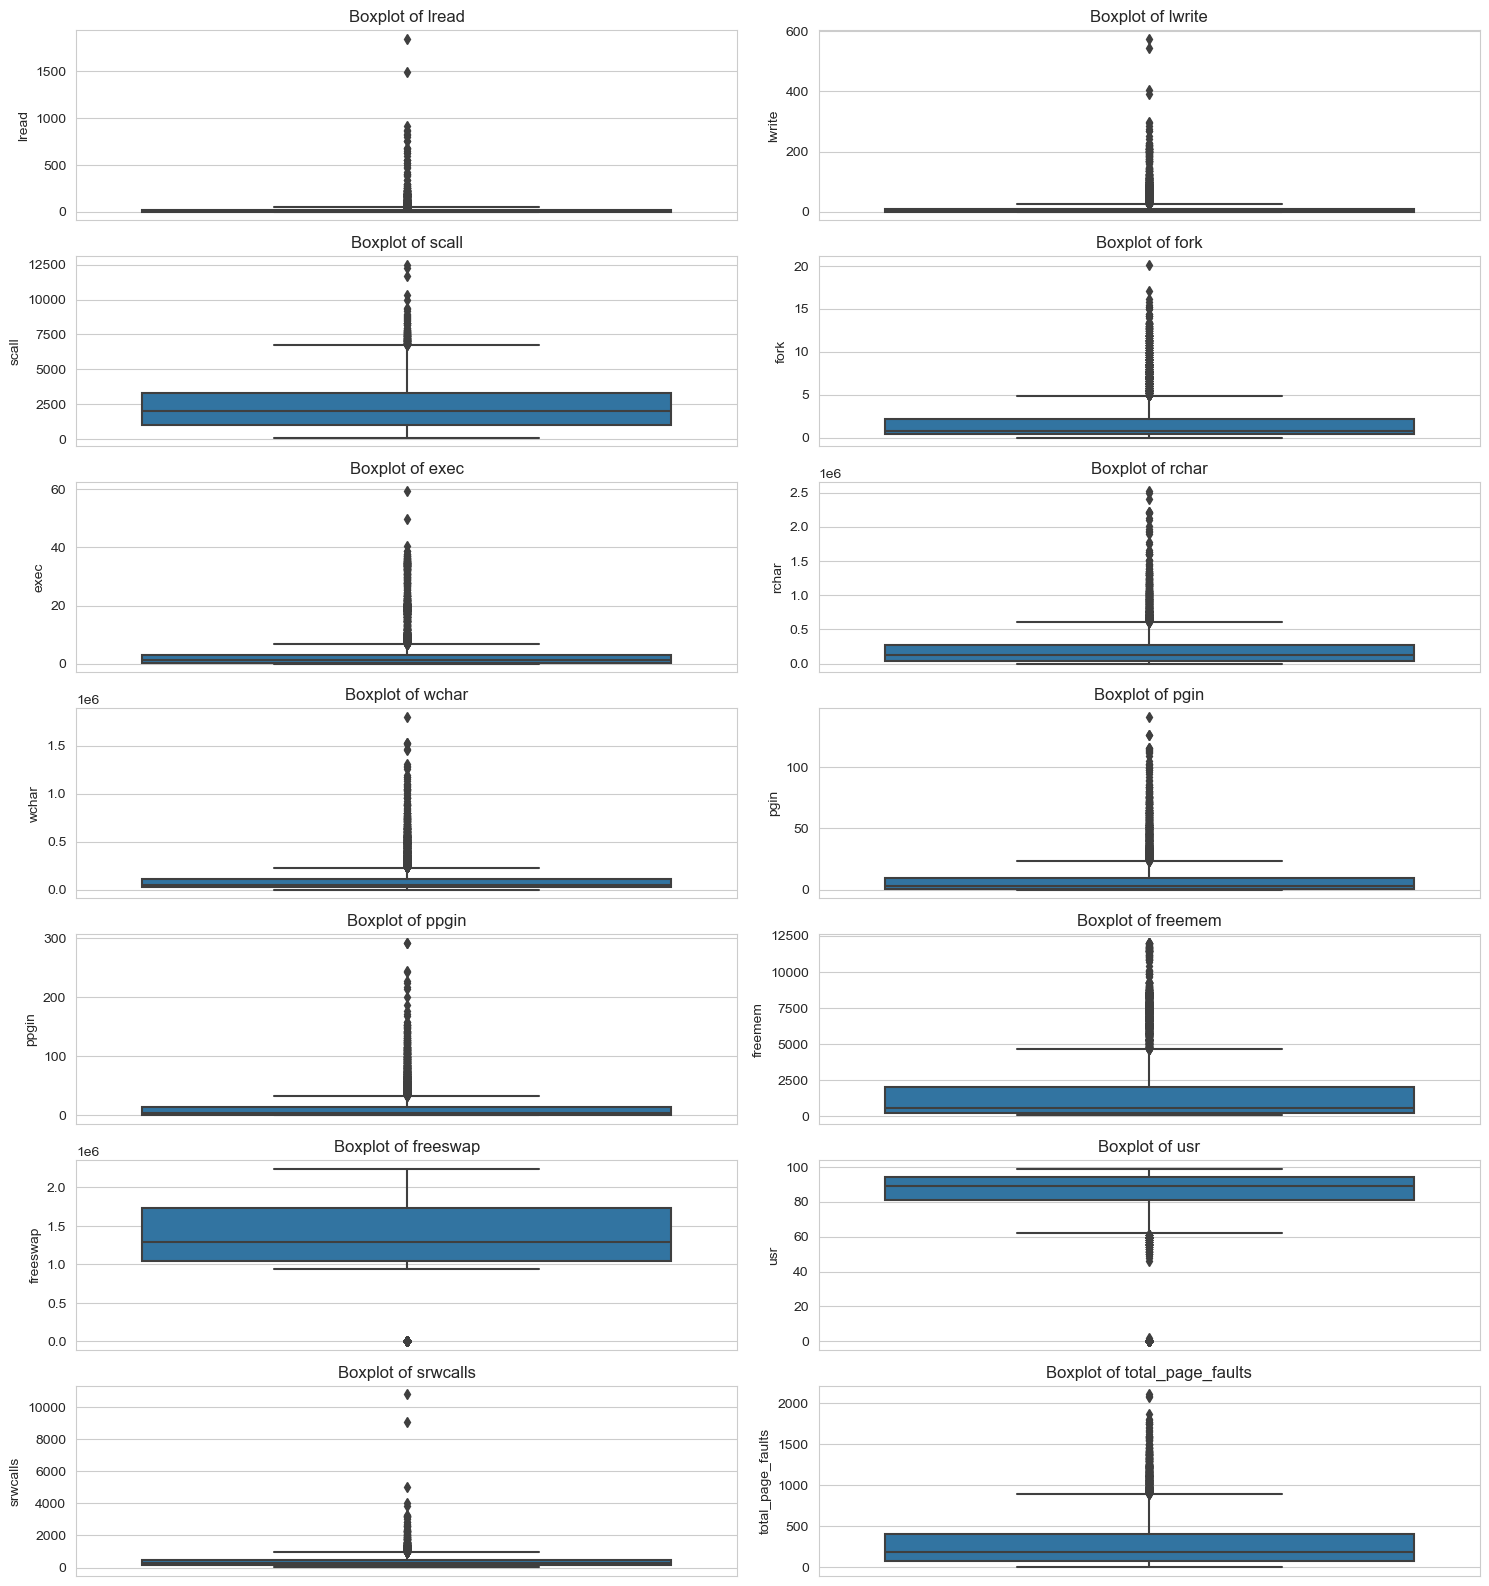

In [1209]:
plt.figure(figsize = (15,25))
feature_list = comp_data_fe_ot.select_dtypes(exclude = 'object').columns
for i in range(len(feature_list)):
    plt.subplot(11, 2, i + 1)
    sns.boxplot(y = comp_data_fe_ot[feature_list[i]], data = comp_data_fe_ot)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [1210]:
# Defining a funtion to remove outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [1211]:
#capping and flooring of outliers with upper and lower bounds respectively
#for column in comp_ot.drop(['usr'],axis=1).columns:
for column in comp_ot.columns:
    if comp_ot[column].dtype != 'object':
        lr,ur=remove_outlier(comp_ot[column])
        comp_ot[column]=np.where(comp_ot[column]>ur,ur,comp_ot[column])
        comp_ot[column]=np.where(comp_ot[column]<lr,lr,comp_ot[column])

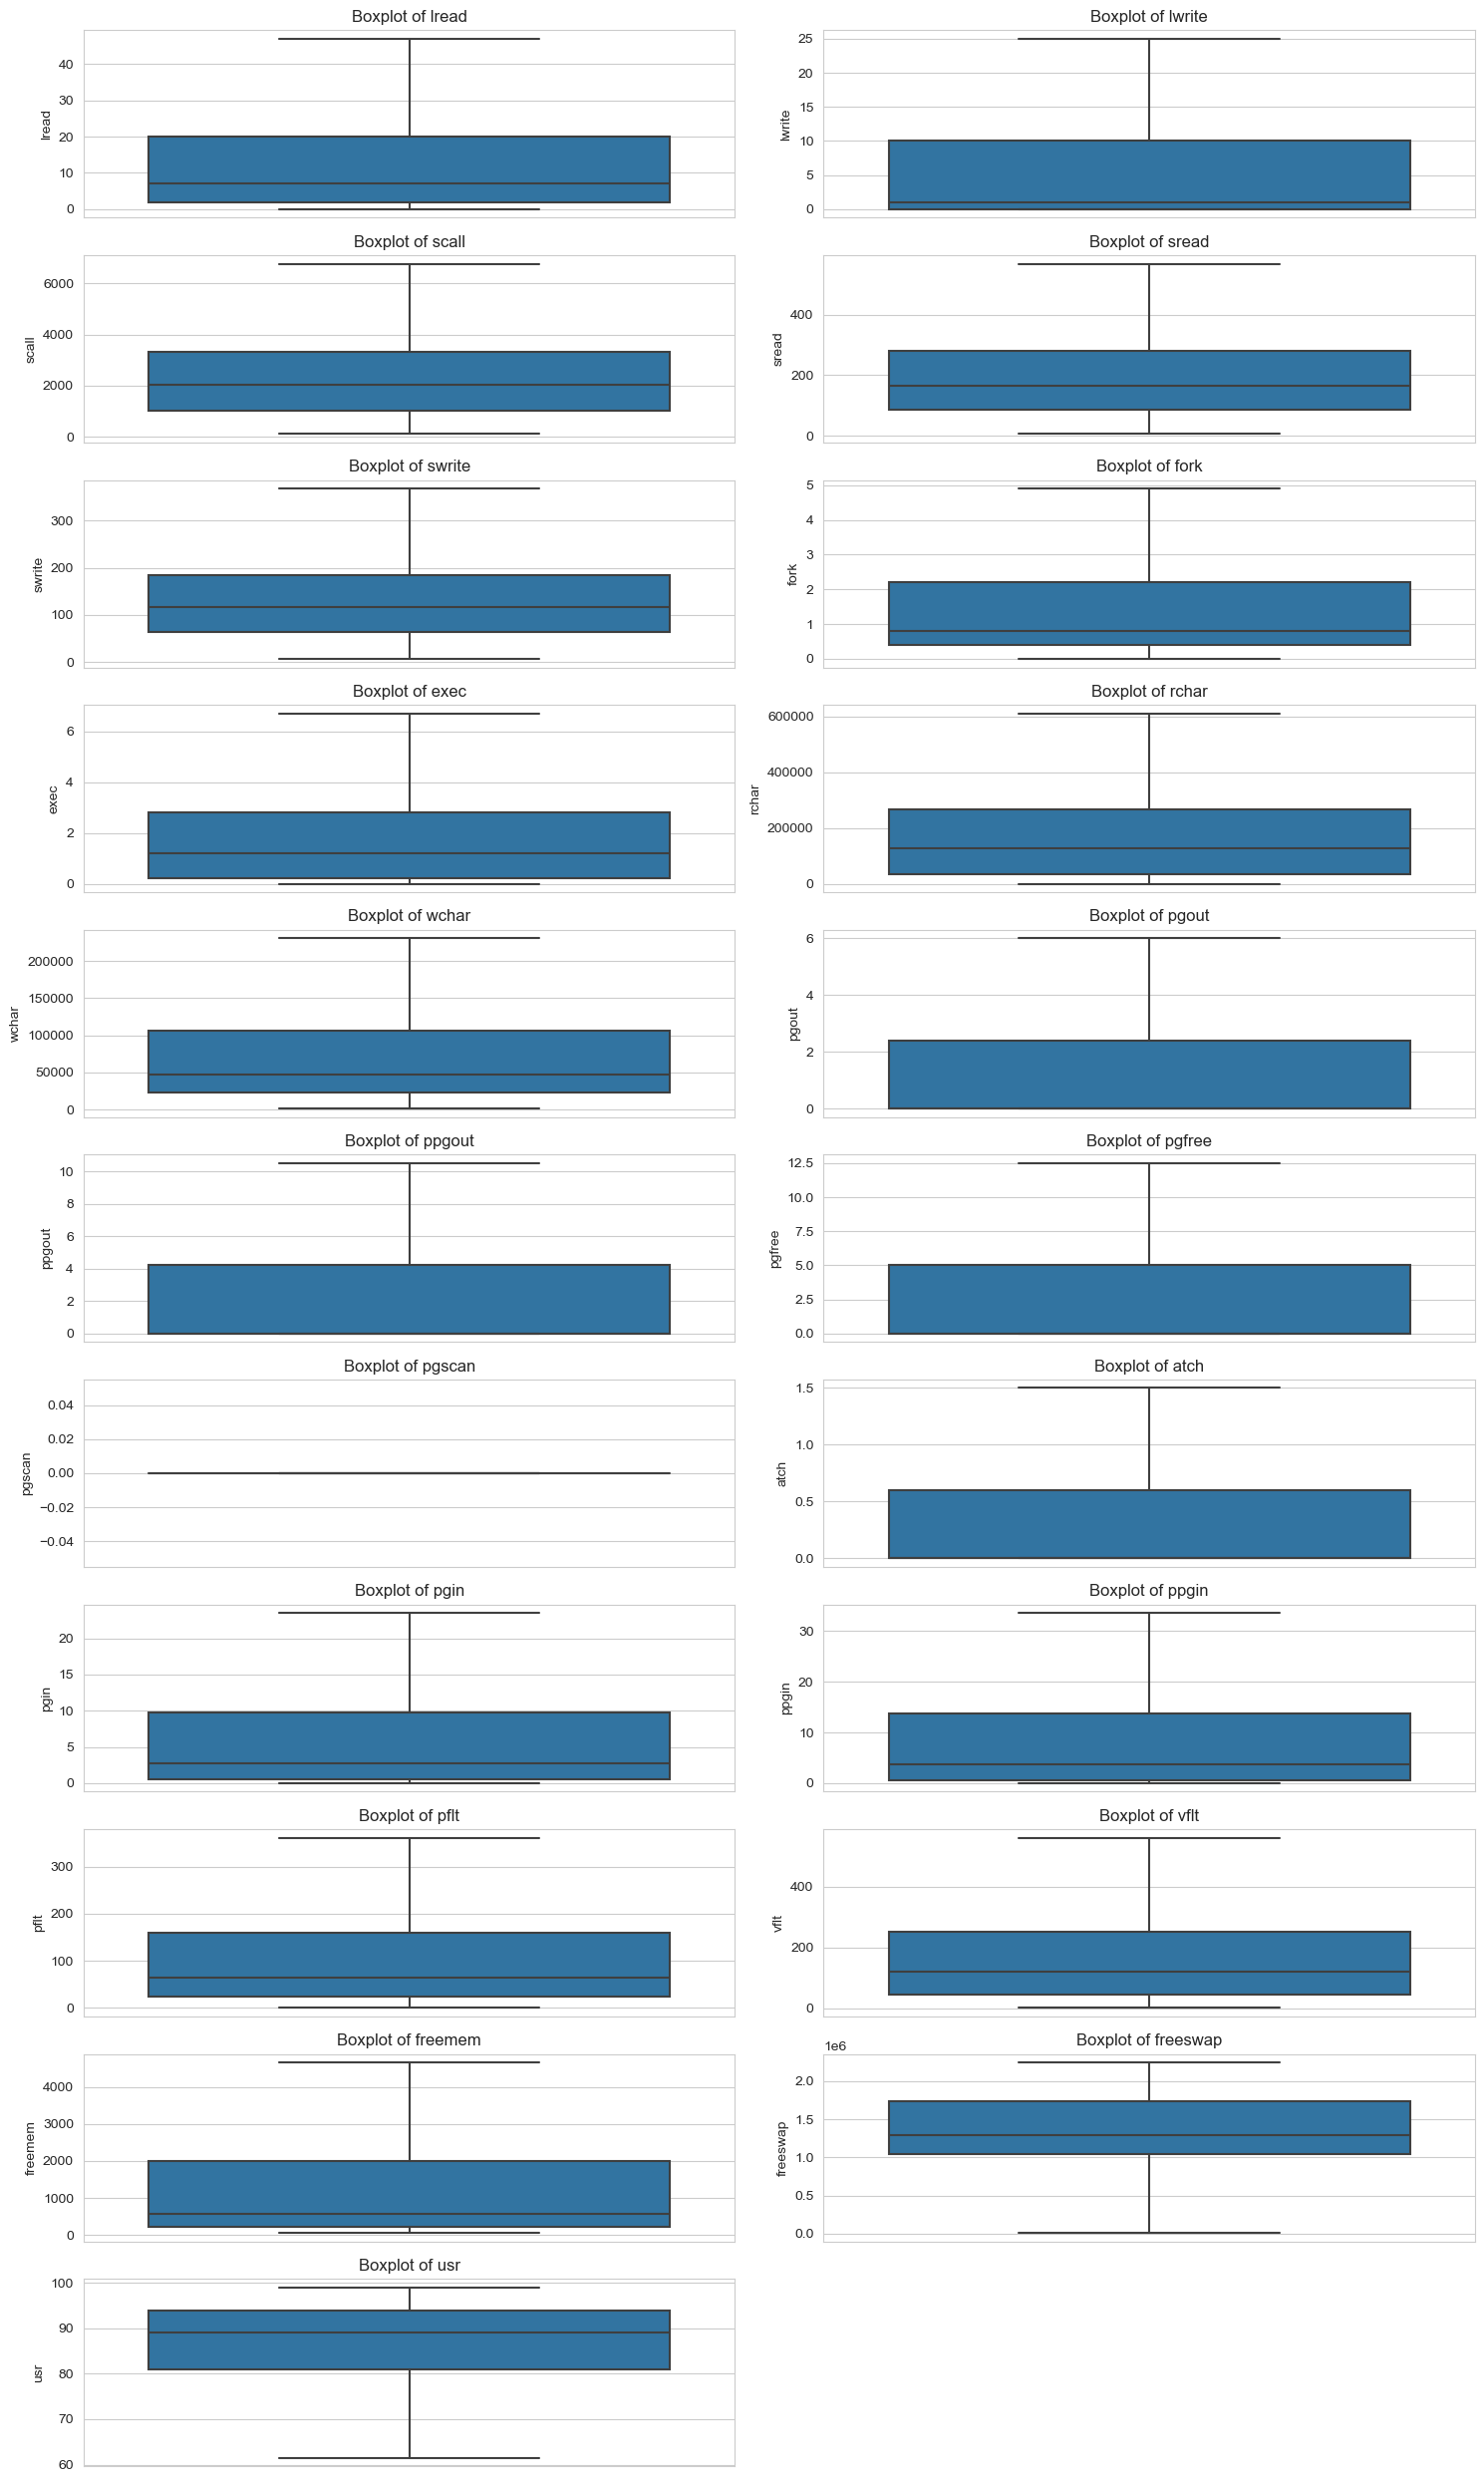

In [1212]:
plt.figure(figsize = (15,25))
feature_list = comp_ot.select_dtypes(exclude = 'object').columns
for i in range(len(feature_list)):
    plt.subplot(11, 2, i + 1)
    sns.boxplot(y = comp_ot[feature_list[i]], data = comp_ot)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

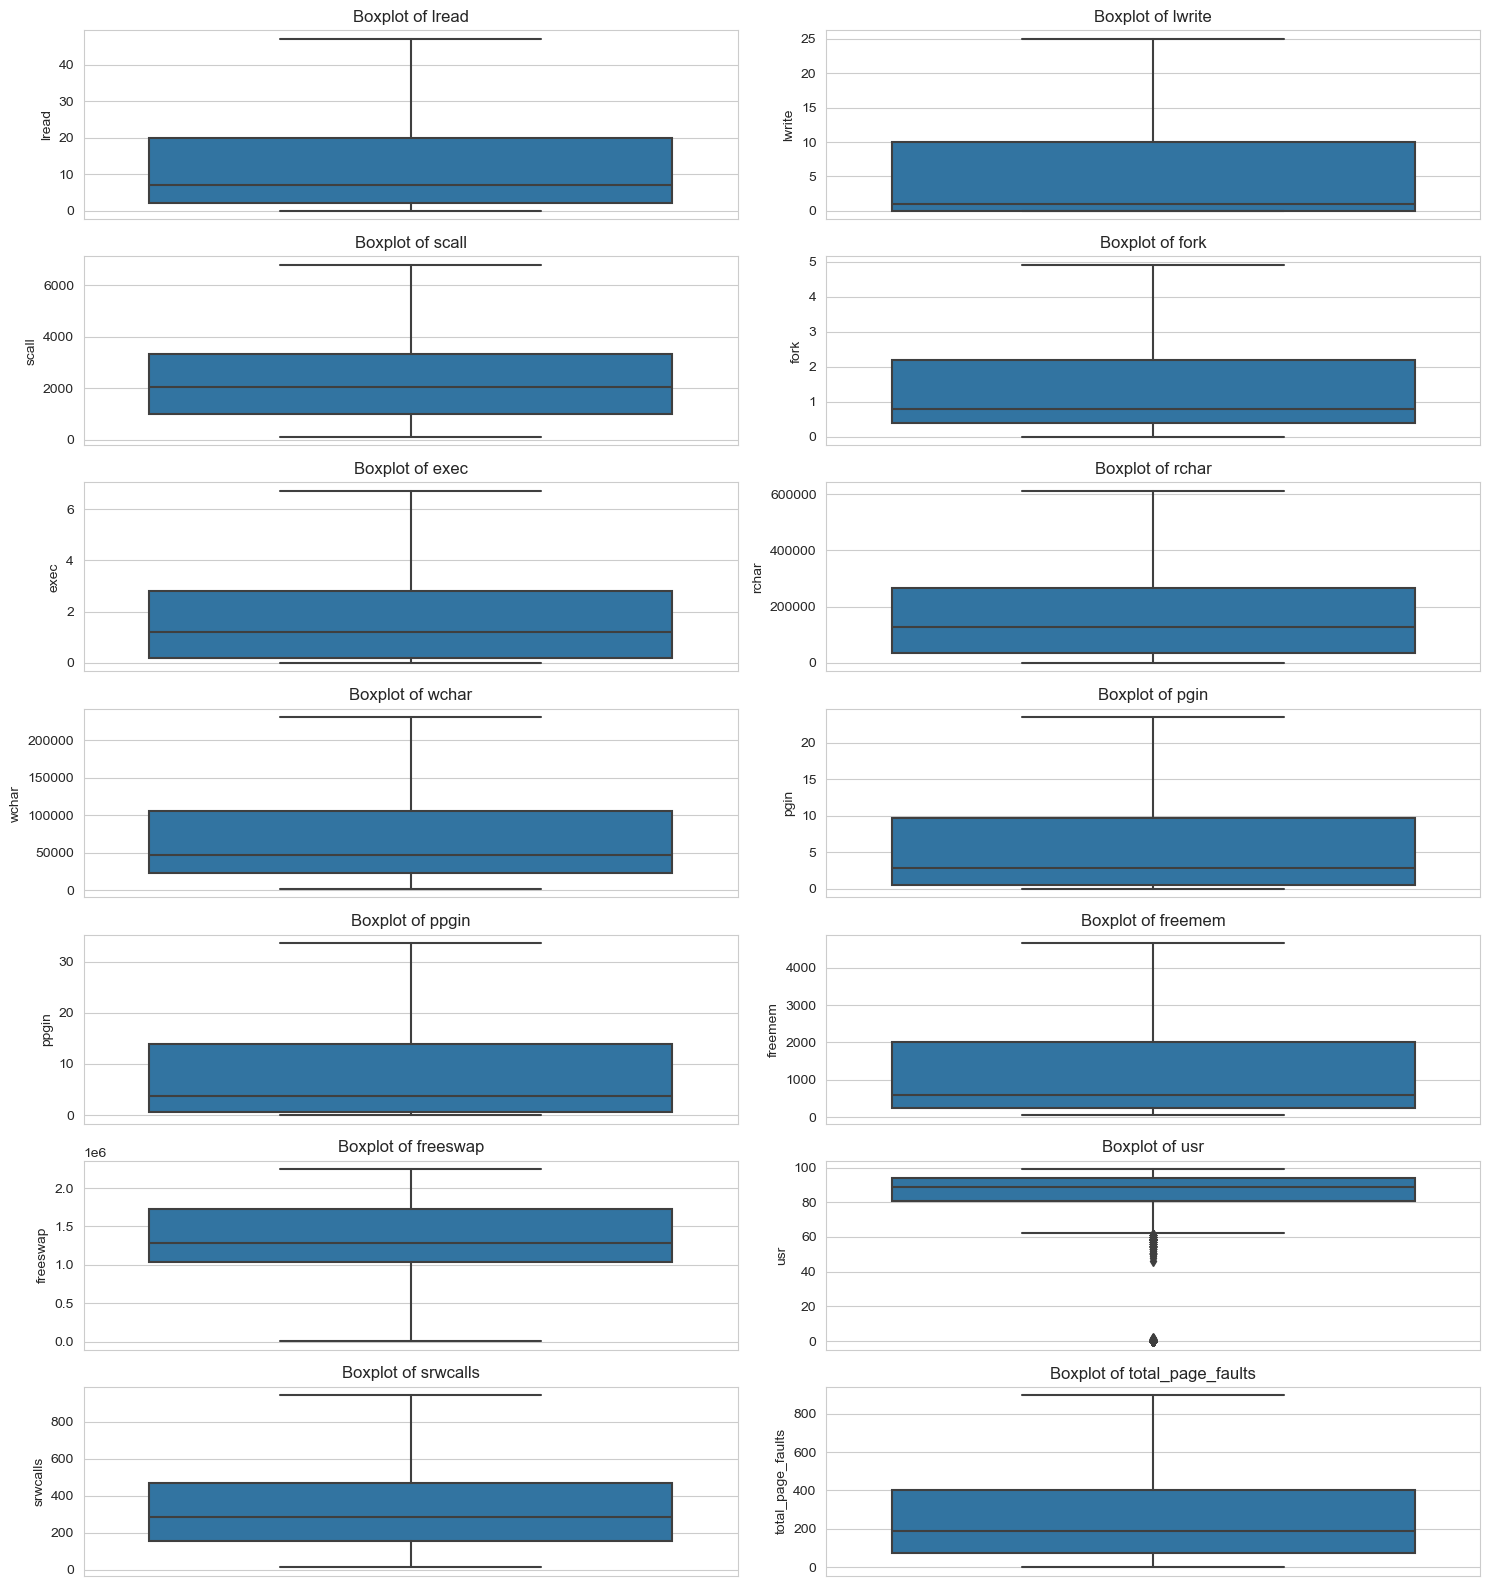

In [1213]:
#capping and flooring of outliers with upper and lower bounds respectively
for column in comp_data_fe_ot.drop(['usr'],axis=1).columns:
    if comp_data_fe_ot[column].dtype != 'object':
        lr,ur=remove_outlier(comp_data_fe_ot[column])
        comp_data_fe_ot[column]=np.where(comp_data_fe_ot[column]>ur,ur,comp_data_fe_ot[column])
        comp_data_fe_ot[column]=np.where(comp_data_fe_ot[column]<lr,lr,comp_data_fe_ot[column])

plt.figure(figsize = (15,25))
feature_list = comp_data_fe_ot.select_dtypes(exclude = 'object').columns
for i in range(len(feature_list)):
    plt.subplot(11, 2, i + 1)
    sns.boxplot(y = comp_data_fe_ot[feature_list[i]], data = comp_data_fe_ot)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [1214]:
#check for duplicates on original processed dataframe
comp_data_new.duplicated().sum()

0

In [1215]:
#check for duplicates
#comp_ot is processed - outlier treated dataframe
comp_ot.duplicated().sum()

0

In [1216]:
#comp_data_fe_ot is processed - feature engineered - outlier treated dataframe
comp_data_fe_ot.duplicated().sum()

0

In [1217]:
#no duplicates rows in data, can proceed with further analysis.

In [1218]:
#viewing info of 3 dataframes before proceeding with linear regression
#processed dataset wothout outlier treatment.
comp_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8192 non-null   float64
 8   wchar     8192 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [1219]:
comp_ot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   float64
 1   lwrite    8192 non-null   float64
 2   scall     8192 non-null   float64
 3   sread     8192 non-null   float64
 4   swrite    8192 non-null   float64
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8192 non-null   float64
 8   wchar     8192 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   float64
 20  freeswap  8192 non-null   floa

In [1220]:
comp_data_fe_ot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   lread              8192 non-null   float64
 1   lwrite             8192 non-null   float64
 2   scall              8192 non-null   float64
 3   fork               8192 non-null   float64
 4   exec               8192 non-null   float64
 5   rchar              8192 non-null   float64
 6   wchar              8192 non-null   float64
 7   pgin               8192 non-null   float64
 8   ppgin              8192 non-null   float64
 9   runqsz             8192 non-null   object 
 10  freemem            8192 non-null   float64
 11  freeswap           8192 non-null   float64
 12  usr                8192 non-null   int64  
 13  srwcalls           8192 non-null   float64
 14  total_page_faults  8192 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 960.1+ KB


3.
3A. Encode the data (having string values) for Modelling.


3B. Split the data into train and test (70:30).


3C. Apply Linear regression using scikit learn.


3D. Perform checks for significant variables using appropriate method from statsmodel.


3E. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare.


3F.Compare these models and select the best one with appropriate reasoning.

#encode the data having string values for modelling
#creating new features


runqsz - Process run queue size (The number of kernel threads in memory that are waiting for a CPU to run.
Typically, this value should be less than 2. Consistently higher values mean that the system might be CPU-bound.)

Using this point to encode the value for runqsz categorical column, replace CPU_Bound with 2, Not_CPU_Bound with 1

In [1221]:
# 3 sets of dataframes currently,
#comp_data_new: original processed
#comp_ot: original processed with outlier treated.
#comp_fe_ot: original with feature engineered and outlier treated.


In [1222]:
comp_data_new.runqsz.value_counts()

Not_CPU_Bound    4331
CPU_Bound        3861
Name: runqsz, dtype: int64

In [1223]:
comp_data_new.runqsz = np.where(comp_data_new.runqsz == 'CPU_Bound', 2, 1)

In [1224]:
#encode comp_ot dataframe

In [1225]:
comp_ot.drop(['runqsz'],axis = 1, inplace = True)

In [1226]:
comp_ot['runqsz'] = comp_data_new['runqsz'].values

In [1227]:
comp_ot['runqsz'].value_counts()

1    4331
2    3861
Name: runqsz, dtype: int64

In [1228]:
comp_data_fe_ot.drop(['runqsz'],axis = 1, inplace = True)

In [1229]:
comp_data_fe_ot['runqsz'] = comp_data_new['runqsz'].values

In [1230]:
comp_data_fe_ot['runqsz'].value_counts()

1    4331
2    3861
Name: runqsz, dtype: int64

### Model1: Linear regression on original dataframe using sklearn and statsmodels

In [1231]:
#split the data into train and test using train_test_split

#split the data into dependent and independent variables
# independent variables
X = comp_data_new.drop(["usr"], axis=1)
# dependent variable
y = comp_data_new[["usr"]]

In [1232]:
X.head()

lread  lwrite  scall  sread  swrite  fork  exec      rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2   40671.00  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2     448.00   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4  197385.73  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2  197385.73   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4  197385.73  12185.0    0.0   

   ...  pgfree  pgscan  atch  pgin  ppgin    pflt    vflt  runqsz  freemem  \
0  ...     0.0     0.0   0.0   1.6    2.6   16.00   26.40       2     4670   
1  ...     0.0     0.0   0.0   0.0    0.0   15.63   16.83       1     7278   
2  ...     0.0     0.0   1.2   6.0    9.4  150.20  220.20       1      702   
3  ...     0.0     0.0   0.0   0.2    0.2   15.60   16.80       1     7248   
4  ...     0.0     0.0   0.0   1.0    1.2   37.80   47.60       1      633   

   freeswap  
0   1730946  
1   1869002  
2   1021237  
3   1863704  
4   1760253  

[5 rows x 21 columns]

In [1233]:
y

usr
0      95
1      97
2      87
3      98
4      90
...   ...
8187   80
8188   90
8189   87
8190   83
8191   94

[8192 rows x 1 columns]

In [1234]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [1235]:
X_train.head()

lread  lwrite  scall  sread  swrite  fork  exec     rchar     wchar  \
694       1       1   1345    223     192   0.6   0.6  198703.0  293578.0   
5535      1       1   1429     87      67   0.2   0.2    7163.0   24842.0   
4244     49      71   3273    225     180   0.6   0.4   83246.0   53705.0   
2472     13       8   4349    300     191   2.8   3.0   96009.0   70467.0   
7052     17      23    225     13      13   0.4   1.6   17132.0   12514.0   

      pgout  ...  pgfree  pgscan  atch  pgin  ppgin    pflt    vflt  runqsz  \
694    0.60  ...   23.40    56.4  2.60  3.80   7.40   28.20   56.60       2   
5535   0.00  ...    0.00     0.0  0.00  1.60   1.60   15.77   30.74       1   
4244   5.39  ...    7.19     0.0  2.79  3.99   4.59   59.88   74.05       2   
2472   0.00  ...    0.00     0.0  0.00  2.80   3.20  129.00  236.80       2   
7052   0.00  ...    0.00     0.0  0.00  0.00   0.00   19.80   23.80       1   

      freemem  freeswap  
694       121   1375446  
5535     1476   1021541  
4244       82        18  
2472      772    993909  
7052     4179   1821682  

[5 rows x 21 columns]

In [1236]:
X_test.head()

lread  lwrite  scall  sread  swrite  fork  exec     rchar     wchar  \
3894     27      39   1252     53     118   0.2   0.2   26592.0   54394.0   
4276      1       0    996     85      55   0.4   0.4   16667.0   36431.0   
3414      9       7   1530    247     135   0.4   0.4   14513.0   61905.0   
4165     32       4   3243    182     140   5.2   5.6  337517.0   94832.0   
7385     16       3   5017    259     249   2.8   1.4   73537.0  237547.0   

      pgout  ...  pgfree  pgscan  atch  pgin  ppgin    pflt    vflt  runqsz  \
3894    0.0  ...     0.0     0.0   0.0   0.4    0.6   19.44   20.04       1   
4276    0.0  ...     0.0     0.0   0.0   1.0    1.4   35.53   52.10       1   
3414   13.8  ...    30.4    24.2  10.4  14.8   18.4   26.80  186.20       2   
4165    0.8  ...     1.0     0.0   1.4   4.6    7.0  250.60  420.20       2   
7385    0.0  ...     0.0     0.0   0.0   5.6    5.8  142.80  276.20       2   

      freemem  freeswap  
3894     7762   1875466  
4276     2979   1010114  
3414       89        11  
4165     1300   1535309  
7385     2114    988600  

[5 rows x 21 columns]

In [1237]:
y_train.head()

usr
694    91
5535   94
4244    0
2472   83
7052   94

In [1238]:
y_test.head()

usr
3894   95
4276   95
3414    0
4165   80
7385   79

In [1239]:
#fit linear model using scikit learn
#3C.
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [1240]:
#r-squared
model.score(X_train, y_train)

0.6428635339299968

In [1241]:
y_train_pred = model.predict(X_train)

In [1242]:
y_test_pred = model.predict(X_test)

In [1243]:
r2_train = r2_score(y_train, y_train_pred)
r2_train

0.6428635339299968

In [1244]:
model.score(X_test, y_test)

0.6311655542699877

In [1245]:
r2_test = r2_score(y_test, y_test_pred)
r2_test

0.6311655542699877

In [1246]:
#rsqaured on training data is 0.64
#rsquared on testing data is 0.63

#indicates score and r2 score given rsquared value for different arguments.

In [1247]:
#root_mean_squared_error(RMSE) for train and test data

np.sqrt(mean_squared_error(y_train, y_train_pred))

10.812852066246723

In [1248]:
np.sqrt(mean_squared_error(y_test, y_test_pred))

11.594824236143966

In [1249]:
#very high mean sqaured errors. the dataset will need some modifications to be passed to improve accuracy

In [1250]:
mean_absolute_error(y_train, y_train_pred)

7.768723515658079

In [1251]:
mean_absolute_error(y_test, y_test_pred)

8.17164725790508

In [1252]:
#pretty high mean absolute errors as well.

In [1253]:
#adjusted r-squared on training and test data

In [1254]:
#calculating number of observations and independent variables on training data.

no_of_observations = X_train.shape[0]
no_of_independent_variables = X_train.shape[1]

#calculating adj_rsqaured on training data
adj_r2_train = 1 - (1 - r2_train) * (no_of_observations - 1) / (no_of_observations - no_of_independent_variables - 1)
print(adj_r2_train)

0.6415505322165043


In [1255]:
#calculating number of observations and independent variables on training data.

no_of_observations = X_test.shape[0]
no_of_independent_variables = y_test.shape[1]

#calculating adj_rsqaured on training data
adj_r2_test = 1 - (1 - r2_test) * (no_of_observations - 1) / (no_of_observations - no_of_independent_variables - 1)
print(adj_r2_test)

0.6310153773784037


In [1256]:
#adjusted rsquared on training data - 0.64
#adjusted rsquared on test data - 0.63

Text(0, 0.5, 'Y predicted values')

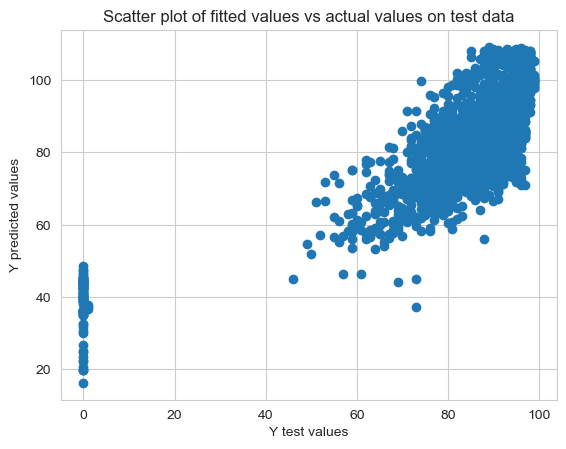

In [1257]:
plt.title('Scatter plot of fitted values vs actual values on test data')
plt.scatter(y_test, y_test_pred)
plt.xlabel('Y test values')
plt.ylabel('Y predicted values')

In [1258]:
model.coef_

array([[-1.98982426e-02,  4.82254950e-03,  1.00783287e-03,
        -4.29251108e-04, -2.07850528e-03, -1.72163526e+00,
        -8.96257233e-02, -4.11424988e-06, -1.16031000e-05,
        -1.74144052e-01,  9.89642463e-02, -7.02837829e-02,
         8.61101010e-03, -7.82968598e-02,  9.13688023e-02,
        -5.93593716e-02, -4.15026113e-02,  2.22821368e-02,
        -7.78836881e+00, -1.61663832e-03,  3.21908454e-05]])

In [1259]:
model.intercept_

array([60.2235535])

In [1260]:
#As we can see from the scores above, the model has less accuracy. Let's see if we can try to improve the model by any means.

In [1261]:
#3D. Perform checks for significant variables using appropriate method from statsmodel. 

In [1262]:
# let's add the intercept to data
#sm is statsmodels.api library, below function adds const 1.0 columns to the data
X_train = sm.add_constant(X_train)

In [1263]:
olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()
# let's print the regression summary
olsres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    usr   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     489.6
Date:                Sun, 30 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:05:35   Log-Likelihood:                -21787.
No. Observations:                5734   AIC:                         4.362e+04
Df Residuals:                    5712   BIC:                         4.377e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.2236      0.776     77.637      0.000      58.703      61.744
lread         -0.0199      0.003     -6.217      0.000      -0.026      -0.014
lwrite         0.0048      0.006      0.799      0.424      -0.007       0.017
scall          0.0010      0.000      7.449      0.000       0.001       0.001
sread         -0.0004      0.002     -0.234      0.815      -0.004       0.003
swrite        -0.0021      0.002     -1.037      0.300      -0.006       0.002
fork          -1.7216      0.244     -7.050      0.000      -2.200      -1.243
exec          -0.0896      0.048     -1.879      0.060      -0.183       0.004
rchar      -4.114e-06   8.29e-07     -4.961      0.000   -5.74e-06   -2.49e-06
wchar       -1.16e-05   1.28e-06     -9.091      0.000   -1.41e-05    -9.1e-06
pgout         -0.1741      0.064     -2.721      0.007      -0.300      -0.049
ppgout         0.0990      0.037      2.702      0.007       0.027       0.171
pgfree        -0.0703      0.020     -3.505      0.000      -0.110      -0.031
pgscan         0.0086      0.006      1.361      0.174      -0.004       0.021
atch          -0.0783      0.027     -2.939      0.003      -0.131      -0.026
pgin           0.0914      0.029      3.107      0.002       0.034       0.149
ppgin         -0.0594      0.019     -3.127      0.002      -0.097      -0.022
pflt          -0.0415      0.004     -9.696      0.000      -0.050      -0.033
vflt           0.0223      0.003      6.665      0.000       0.016       0.029
runqsz        -7.7884      0.303    -25.684      0.000      -8.383      -7.194
freemem       -0.0016   7.53e-05    -21.482      0.000      -0.002      -0.001
freeswap    3.219e-05   4.53e-07     70.984      0.000    3.13e-05    3.31e-05
==============================================================================
Omnibus:                     1507.116   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4767.078
Skew:                          -1.333   Prob(JB):                         0.00
Kurtosis:                       6.584   Cond. No.                     7.80e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.8e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1264]:
for i,j in np.array(olsres.params.reset_index()):
    print('({}) * {} +'.format(round(j,3),i),end=' ')

(60.224) * const + (-0.02) * lread + (0.005) * lwrite + (0.001) * scall + (-0.0) * sread + (-0.002) * swrite + (-1.722) * fork + (-0.09) * exec + (-0.0) * rchar + (-0.0) * wchar + (-0.174) * pgout + (0.099) * ppgout + (-0.07) * pgfree + (0.009) * pgscan + (-0.078) * atch + (0.091) * pgin + (-0.059) * ppgin + (-0.042) * pflt + (0.022) * vflt + (-7.788) * runqsz + (-0.002) * freemem + (0.0) * freeswap + 

#interpreting significant variables


The coefficients tell us how one unit change in X can affect y.

The sign of the coefficient indicates if the relationship is positive or negative.

In this data ser, for example

An increase in 1 unit of fork is going to decrease the value of usr by -1.653.
An increase in 2 unit of ppgout is going to increase the value of use by 0.102

However we observe that not all variables have very significant influence on the predictor variable. Value of cond from the above summary is high which indicates that there are also possible signs of multi collinearity

Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the collinearity between variables is high, we might not be able to trust the p-values to identify independent variables that are statistically significant.

When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

Interpreting significant coefficients

Null hypothesis: Predictor variable is not significant
Alternate hypothesis: predictor variable is significant 

(P > |t|) gives the p-value for each predictor variable to check the null hypothesis.

If the level of significance is set to 5% (0.05), the p-values greater than 0.05 would indicate that the corresponding predictor variables are not significant.

However, due to the presence of multicollinearity in our data, the p-values will also change.

We need to ensure that there is no multicollinearity in order to interpret the p-values.

        coef	P>|t|
const	60.2459	0
lread	-0.0203	0
lwrite	0.0051	0.395
scall	0.001	0
sread	-0.0003	0.89
swrite	-0.0021	0.29
fork	-1.6534	0
exec	-0.0931	0.051
rchar	-4.30E-06	0
wchar	-1.21E-05	0
pgout	-0.2207	0
ppgout	0.1022	0.005
pgfree	-0.0493	0
pgin	0.0902	0.002
ppgin	-0.056	0.003
pflt	-0.0406	0
vflt	0.0208	0
runqsz	-7.8037	0
freemem	-0.0016	0
freeswap	3.22E-05	0

H0: lread = 0, probability of lread being -0.0203 is 0 - reject null hypothesis - variable significant


H0: lwrite = 0, probability of lwrite being 0.0051 is 0.395 - fail to reject null hypothesis - variable not significant

H0: scall = 0, probability of lwrite being 0.001 is 0.0 - reject null hypothesis - variable significant

H0: sread = 0, probability of swrite being  is -0.0003 is 0.89 - fail to reject null hypothesis - variable not significant

H0: swrite = 0, probability of swrite being -0.0021 is 0.29 - fail to reject null hypothesis - variable not significant

H0: fork = 0, probability of fork being -1.6354 is 0 - reject null hypothesis - variable significant

H0: exec = 0, probability of exec being -0.0931 is 0.051 - fail to reject null hypothesis - variable not significant.

remaining all are significant variables in determining y

Insignificant variables turned out to be lwrite, sread, swrite, exec
let's see if we can drop these variables.



### Checking for assumptions of linear regression from the model:

1. Linearity: 


plot graph between residual and actual values. We should not find any pattern in the plot.

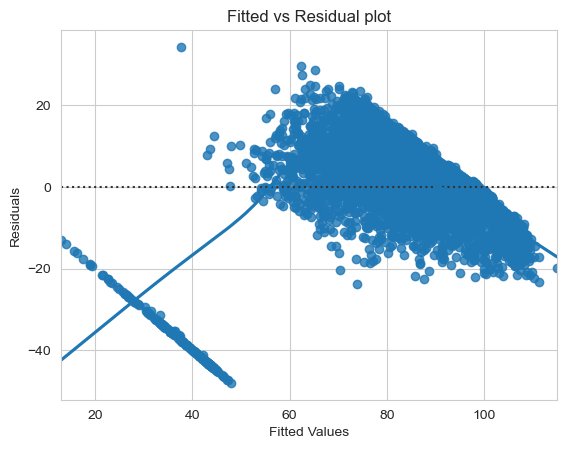

In [1265]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres.resid.values  # residuals

df_pred.head()

# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

In [1266]:
df_pred['Residuals']

0        7.591772
1       10.416487
2      -42.981718
3       10.282900
4       -8.948368
          ...    
5729     3.351085
5730    -3.071260
5731     9.576695
5732    -1.386654
5733    -7.140330
Name: Residuals, Length: 5734, dtype: float64

In [1267]:
#sns.scatterplot(x = df_pred['Residuals'], y = y_test_np[:,0])

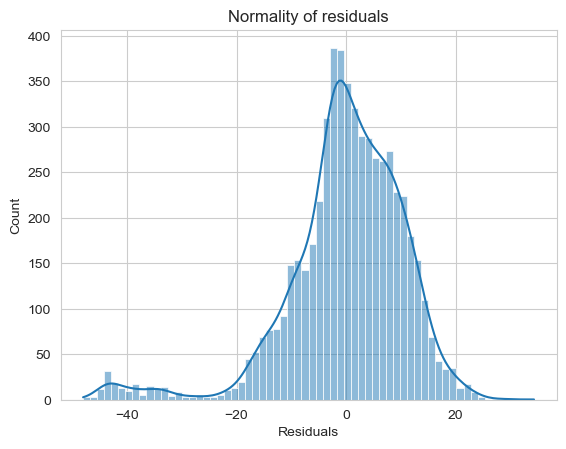

In [1268]:
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

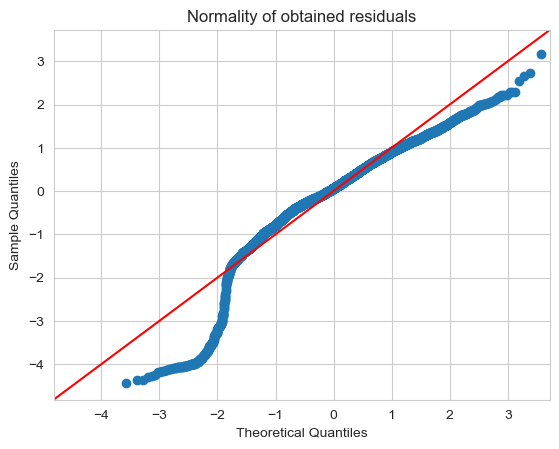

In [1269]:
#3. Normality of residuals
fig = sm.qqplot(df_pred['Residuals'],fit=True,line='45')
plt.title('Normality of obtained residuals')
plt.show()

The Shapiro-Wilk test can also be used for checking the normality. The null and alternate hypotheses of the test are as follows:

Null hypothesis - Data is normally distributed.
Alternate hypothesis - Data is not normally distributed.

In [1270]:
from scipy.stats import shapiro
shapiro(df_pred["Residuals"])

C:\Users\yamin\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9143909215927124, pvalue=0.0)

Since p-value < 0.05, the residuals are not normal as per shapiro test.

In [1271]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [1272]:
print('jarque_bera:',jarque_bera(df_pred["Residuals"]))

jarque_bera: Jarque_beraResult(statistic=4767.077751939916, pvalue=0.0)


In [1273]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], X_train)
lzip(name, test)

[('F statistic', 1.1191911669084869), ('p-value', 0.0013407520853184723)]

In [1274]:
#check for multicollinearity in the given dataset.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train.values, ix) for ix in range(X_train.shape[1])] 
i=0
for column in X_train.columns:
    print (column ,"--->",  vif[i])
    i = i+1

const ---> 29.396674024351302
lread ---> 1.4726232048968209
lwrite ---> 1.4059261869416075
scall ---> 2.414380871062771
sread ---> 6.835552281610552
swrite ---> 5.3194637012489245
fork ---> 18.210272008017036
exec ---> 3.0598443621331946
rchar ---> 1.9733948315385506
wchar ---> 1.552883396109173
pgout ---> 5.776039832734953
ppgout ---> 15.906860655416306
pgfree ---> 20.437658507680652
pgscan ---> 9.237219859065991
atch ---> 1.087544971161994
pgin ---> 8.074840311169055
ppgin ---> 8.670888402691117
pflt ---> 11.834193634585576
vflt ---> 20.230202165729885
runqsz ---> 1.1190316847699355
freemem ---> 1.677344709491036
freeswap ---> 1.7612101175022241


In [1280]:
#function that accepts two parameters, dataset and a bool variable (normalize). 
#If true, then given dataset is normalized for the variables 'freemem' and 'freeswap' 
#Else regression is run without normalization

def LinearRegressionUsingSkLearn(comp_ot):
    #split the data into dependent and independent variables
    # independent variables
    X = comp_ot.drop(["usr"], axis=1)
    # dependent variable
    y = comp_ot[["usr"]]

    #splitting comp_ot data in 70:30 ratio
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.30, random_state=1
    )

    #fit linear model using scikit learn
    #3C.
    model = LinearRegression()
    model.fit(X_train, y_train)

    #obtain predictions for train and test data
    y_train_pred = model.predict(X_train)

    y_test_pred = model.predict(X_test)

    #calculate r-squared on train and test data

    #r-squared (for train): model.score(X_train, y_train) or r2_score(y_train, y_train_pred)
    #r-sqaured(for test): model.score(X_test, y_test) or r2_score(y_test, y_test_pred)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    print('r-squared for training data:',r2_train)

    print('r-squared for test data:',r2_test)

    #root_mean_squared_error(RMSE) for train and test data

    print('RMSE for training data:', np.sqrt(mean_squared_error(y_train, y_train_pred)))

    print('RMSE for test data:', np.sqrt(mean_squared_error(y_test, y_test_pred)))

    #root_mean_squared_error(RMSE) for train and test data

    print('MAE for training data:', mean_absolute_error(y_train, y_train_pred))

    print('MAE for test data:',mean_absolute_error(y_test, y_test_pred))

    #adjusted r-squared on training and test data

    #calculating number of observations and independent variables on training data.

    no_of_observations = X_train.shape[0]
    no_of_independent_variables = X_train.shape[1]

    #calculating adj_rsqaured on training data
    adj_r2_train = 1 - (1 - r2_train) * (no_of_observations - 1) / (no_of_observations - no_of_independent_variables - 1)
    print('adjusted r-sqaured for training data:', adj_r2_train)

    #calculating number of observations and independent variables on training data.

    no_of_observations = X_test.shape[0]
    no_of_independent_variables = y_test.shape[1]

    #calculating adj_rsqaured on training data
    adj_r2_test = 1 - (1 - r2_test) * (no_of_observations - 1) / (no_of_observations - no_of_independent_variables - 1)
    print('adjusted r-squared for training data:', adj_r2_test)
    plt.title('Actual vs predicted values for test data')
    plt.xlabel('Actual values')
    plt.xlabel('Predicted values')
    plt.scatter(y_test, y_test_pred);

    print('Coefficients of model are:', model.coef_)

    print('Intercept of the model is:', model.intercept_)

### Model2: linear regression on outlier treated dataset.

In [1281]:
comp_ot.head()

lread  lwrite   scall  sread  swrite  fork  exec      rchar    wchar  \
0    1.0     0.0  2147.0   79.0    68.0   0.2   0.2   40671.00  53995.0   
1    0.0     0.0   170.0   18.0    21.0   0.2   0.2     448.00   8385.0   
2   15.0     3.0  2162.0  159.0   119.0   2.0   2.4  197385.73  31950.0   
3    0.0     0.0   160.0   12.0    16.0   0.2   0.2  197385.73   8670.0   
4    5.0     1.0   330.0   39.0    38.0   0.4   0.4  197385.73  12185.0   

   pgout  ...  pgscan  atch  pgin  ppgin    pflt    vflt   freemem   freeswap  \
0    0.0  ...     0.0   0.0   1.6    2.6   16.00   26.40  4659.125  1730946.0   
1    0.0  ...     0.0   0.0   0.0    0.0   15.63   16.83  4659.125  1869002.0   
2    0.0  ...     0.0   1.2   6.0    9.4  150.20  220.20   702.000  1021237.0   
3    0.0  ...     0.0   0.0   0.2    0.2   15.60   16.80  4659.125  1863704.0   
4    0.0  ...     0.0   0.0   1.0    1.2   37.80   47.60   633.000  1760253.0   

    usr  runqsz  
0  95.0       2  
1  97.0       1  
2  87.0       1  
3  98.0       1  
4  90.0       1  

[5 rows x 22 columns]

In [1282]:
comp_ot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   float64
 1   lwrite    8192 non-null   float64
 2   scall     8192 non-null   float64
 3   sread     8192 non-null   float64
 4   swrite    8192 non-null   float64
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8192 non-null   float64
 8   wchar     8192 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  freemem   8192 non-null   float64
 19  freeswap  8192 non-null   float64
 20  usr       8192 non-null   floa

r-squared for training data: 0.7961565330412979
r-squared for test data: 0.7676695029876079
RMSE for training data: 4.41901667552372
RMSE for test data: 4.652920160978209
MAE for training data: 3.2853840717691467
MAE for test data: 3.3811292738881704
adjusted r-sqaured for training data: 0.7954071085304203
adjusted r-squared for training data: 0.7675749058797039
Coefficients of model are: [[-6.34099732e-02  4.80183861e-02 -6.64352337e-04  3.38587579e-04
  -5.45988181e-03  2.96329957e-02 -3.21063250e-01 -5.21187916e-06
  -5.34633546e-06 -3.66852298e-01 -7.86092008e-02  8.52582013e-02
  -2.22044605e-16  6.30438035e-01  1.97538559e-02 -6.71537211e-02
  -3.35919897e-02 -5.46492175e-03 -4.57661401e-04  8.82932042e-06
  -1.61373724e+00]]
Intercept of the model is: [87.3589129]


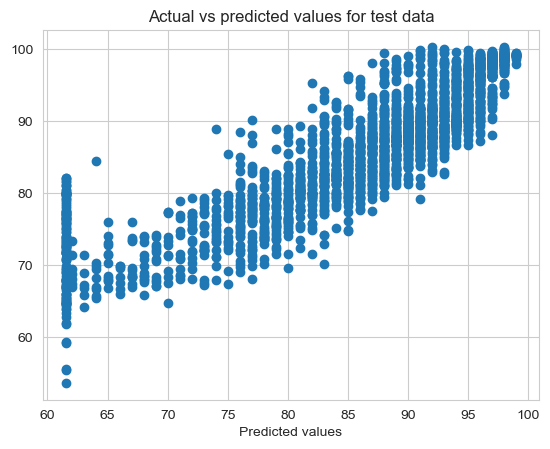

In [1283]:
#Linear Regression on the variables after removing insignificant variables.
LinearRegressionUsingSkLearn(comp_ot)

### Model3: Using Ridge Regression with gridsearch CV

In [1284]:
comp_ot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   float64
 1   lwrite    8192 non-null   float64
 2   scall     8192 non-null   float64
 3   sread     8192 non-null   float64
 4   swrite    8192 non-null   float64
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8192 non-null   float64
 8   wchar     8192 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  freemem   8192 non-null   float64
 19  freeswap  8192 non-null   float64
 20  usr       8192 non-null   floa

In [1300]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

#split the data into dependent and independent variables
# independent variables
X = comp_ot.drop(["usr"], axis=1)
# dependent variable
y = comp_ot[["usr"]]

#splitting comp_ot data in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.30, random_state=1)
#param_grid={'alpha':np.logspace(-3,3)}
param_grid = {'alpha':[0.1, 0.3, 0.9,2,5,10]}

ridge_g=Ridge(random_state=23)
ridge_grid=GridSearchCV(estimator = ridge_g,param_grid=param_grid, cv = 10,return_train_score=True)
ridge_grid.fit(X_train,y_train)
Ridge_hyper_grid=ridge_grid.best_params_
print("The best hyperparameter is {} with score of {}".format(Ridge_hyper_grid,ridge_grid.best_score_))

C:\Users\yamin\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.73956e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\yamin\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.82645e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\yamin\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.6746e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\yamin\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=9.73125e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\yamin\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlg

The best hyperparameter is {'alpha': 10} with score of 0.7942819721094774


In [1301]:
def MAPE_calculation(y_true,y_pred):
        y_true,y_pred=np.array(y_true),np.array(y_pred)
        return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [1302]:
def check_performance(model):
    print("Metrics for ridge regression on outlier treated data are as follows:")
    print("Train_R_squared =",model.best_estimator_.score(X_train, y_train)) 
    print("Test_R_squared =", model.best_estimator_.score(X_test, y_test))  
    print("RMSE_train =", np.sqrt(mean_squared_error(y_train, model.best_estimator_.predict(X_train))))
    print("RMSE_test = ", np.sqrt(mean_squared_error(y_test, model.best_estimator_.predict(X_test))))
    print("MAPE_train =", MAPE_calculation(y_train, model.best_estimator_.predict(X_train)))
    print("MAPE_test = ", MAPE_calculation(y_test, model.best_estimator_.predict(X_test)))
    print("coefficients:", model.best_estimator_.coef_)
    print("intercept:", model.best_estimator_.intercept_)

    return model.best_estimator_.score(X_train, y_train),model.best_estimator_.score(X_test, y_test),MAPE_calculation(y_train,model.best_estimator_.predict(X_train)),MAPE_calculation(y_test, model.best_estimator_.predict(X_test))

In [1303]:
Ridge_R2_train_g,Ridge_R2_test_g,Ridge_MAPE_train_g,Ridge_MAPE_test_g=check_performance(ridge_grid)

Metrics for ridge regression on outlier treated data are as follows:
Train_R_squared = 0.7961560625318421
Test_R_squared = 0.7676340089467395
RMSE_train = 4.4190217754858665
RMSE_test =  4.653275569831691
MAPE_train = 4.07420489455903
MAPE_test =  4.212657002437359
coefficients: [[-6.34925693e-02  4.81214007e-02 -6.65073197e-04  3.36966691e-04
  -5.45554857e-03  2.89028623e-02 -3.20530850e-01 -5.21484284e-06
  -5.36332166e-06 -3.64367367e-01 -7.90216221e-02  8.50837414e-02
   0.00000000e+00  6.23768033e-01  1.96785056e-02 -6.71021446e-02
  -3.35952578e-02 -5.45732301e-03 -4.57415785e-04  8.82755644e-06
  -1.60086257e+00]]
intercept: [87.34539859]


In [1307]:
ridge_grid.best_estimator_.coef_

array([[-6.34925693e-02,  4.81214007e-02, -6.65073197e-04,
         3.36966691e-04, -5.45554857e-03,  2.89028623e-02,
        -3.20530850e-01, -5.21484284e-06, -5.36332166e-06,
        -3.64367367e-01, -7.90216221e-02,  8.50837414e-02,
         0.00000000e+00,  6.23768033e-01,  1.96785056e-02,
        -6.71021446e-02, -3.35952578e-02, -5.45732301e-03,
        -4.57415785e-04,  8.82755644e-06, -1.60086257e+00]])

### Model4: Selecting the ideal features giving lowest AIC score using stepwise regression

In [1306]:
comp_stepwise = comp_ot.copy()
comp_stepwise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   float64
 1   lwrite    8192 non-null   float64
 2   scall     8192 non-null   float64
 3   sread     8192 non-null   float64
 4   swrite    8192 non-null   float64
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8192 non-null   float64
 8   wchar     8192 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  freemem   8192 non-null   float64
 19  freeswap  8192 non-null   float64
 20  usr       8192 non-null   floa

In [1293]:
#split the data into dependent and independent variables
# independent variables
X = comp_stepwise.drop(["usr"], axis=1)
# dependent variable
y = comp_stepwise[["usr"]]

#splitting comp_ot data in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.30, random_state=1)

In [1294]:
def combine_fs_be_stepaic(X,y):
    X["intercept"] = 1
    cols = X.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    X = X[cols]

    iterations_log = ""
    cols = X.columns.tolist()
    selected_cols = ["intercept"]
    remaining_cols = cols.copy()
    remaining_cols.remove("intercept")
    print("Remaining columns : ",remaining_cols)
    model = sm.OLS(y, X[selected_cols]).fit()
    criteria = model.aic
    print("Null model AIC critetia :",criteria)
    
    temp_dict = {}
    for i in range(len(remaining_cols)):
        new_col = remaining_cols[i]
        selected_cols.append(new_col)
        model = sm.OLS(y, X[selected_cols]).fit()
        new_criteria = model.aic
        if new_criteria < criteria:
            temp_dict[new_col] = new_criteria
        selected_cols.remove(new_col)
    entered_col = sorted(temp_dict.items(), key=lambda x: x[1])[0][0]
    entered_aic = sorted(temp_dict.items(), key=lambda x: x[1])[0][1]
    print()
    print("Entered column :",entered_col)
    selected_cols.append(entered_col)
    temp_dict = {}
    temp_dict[entered_col] = entered_aic
    first_stage = True
    print("Selected columns :",selected_cols)
    remaining_cols.remove(entered_col)
    print(temp_dict)
    
    while(True):
        if first_stage:
            aic_dict = temp_dict
        else:
            first_stage = False
            aic_dict = {}
        flag = False
        be_remaining_cols = selected_cols.copy()
        be_selected_cols = selected_cols.copy()
        be_remaining_cols.remove('intercept')
        for i in range(len(be_remaining_cols)):
            temp_rmvd_col = be_remaining_cols[i]
            be_selected_cols.remove(temp_rmvd_col)
            model = sm.OLS(y, X[be_selected_cols]).fit()
            new_criteria = model.aic
            be_selected_cols.append(temp_rmvd_col)
            if new_criteria < criteria:
                aic_dict[temp_rmvd_col] = new_criteria
                flag = True
        print()
        col_elig_fr_elim = None
        if flag : 
            col_elig_fr_elim = sorted(aic_dict.items(), key=lambda x: x[1])[0][0]
            print("Column that is eligible for elimination:",col_elig_fr_elim)
        else:
            print('No colums eligible for BE in this stage')
        for i in range(len(remaining_cols)):
            new_col = remaining_cols[i]
            selected_cols.append(new_col)
            model = sm.OLS(y, X[selected_cols]).fit()
            new_criteria = model.aic
            if new_criteria < criteria:
                aic_dict[new_col] = new_criteria
            selected_cols.remove(new_col)
        lowest_aic_col = sorted(aic_dict.items(), key=lambda x: x[1])[0][0]
        prev_criteria = criteria
        if lowest_aic_col == col_elig_fr_elim:
            selected_cols.remove(lowest_aic_col)
            remaining_cols.append(lowest_aic_col)
            model = sm.OLS(y, X[selected_cols]).fit()
            criteria = model.aic
            if prev_criteria<=criteria:
                selected_cols.append(lowest_aic_col)
                remaining_cols.remove(lowest_aic_col)
                break
            print("Eliminated column :",lowest_aic_col)
        else:
            selected_cols.append(lowest_aic_col)
            print('***')
            print(remaining_cols)
            print('***')
            print(lowest_aic_col)
            #remaining_cols.remove(lowest_aic_col)
            model = sm.OLS(y, X[selected_cols]).fit()
            criteria = model.aic
            if prev_criteria<=criteria:
                selected_cols.remove(lowest_aic_col)
                remaining_cols.append(lowest_aic_col)
                break 
            print("Entered column :",lowest_aic_col)
        print("Selected columns :",selected_cols)
        print("Update AIC criteria : ",criteria) 
        
    return selected_cols

In [1297]:
combine_fs_be_stepaic(X_train, y_train)

Remaining columns :  ['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar', 'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin', 'pflt', 'vflt', 'freemem', 'freeswap', 'runqsz']
Null model AIC critetia : 42434.25576543091

Entered column : vflt
Selected columns : ['intercept', 'vflt']
{'vflt': 37438.246069401896}

No colums eligible for BE in this stage
***
['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar', 'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin', 'pflt', 'freemem', 'freeswap', 'runqsz']
***
freeswap
Entered column : freeswap
Selected columns : ['intercept', 'vflt', 'freeswap']
Update AIC criteria :  35143.212816290616

No colums eligible for BE in this stage
***
['lread', 'lwrite', 'scall', 'sread', 'swrite', 'fork', 'exec', 'rchar', 'wchar', 'pgout', 'ppgout', 'pgfree', 'pgscan', 'atch', 'pgin', 'ppgin', 'pflt', 'freemem', 'freeswap', 'runqsz']
***
scall
Entered column : scall
Selected columns

['intercept',
 'vflt',
 'lread',
 'lwrite',
 'scall',
 'swrite',
 'exec',
 'rchar',
 'wchar',
 'pgout',
 'atch',
 'ppgin',
 'pflt',
 'freemem',
 'freeswap',
 'runqsz',
 'pgfree']

In [1298]:
#final selected columns.
#running linear regression model for the above selected columns in the outlier treated dataset.

comp_ot_stepwise = comp_ot[[
 'vflt',
 'lread',
 'lwrite',
 'scall',
 'swrite',
 'exec',
 'rchar',
 'wchar',
 'pgout',
 'atch',
 'ppgin',
 'pflt',
 'freemem',
 'freeswap',
 'runqsz',
 'pgfree',
 'usr']].copy()

r-squared for training data: 0.7960962386216612
r-squared for test data: 0.7677279175447309
RMSE for training data: 4.419670172911013
RMSE for test data: 4.652335185349423
MAE for training data: 3.286162439718979
MAE for test data: 3.3800684324361923
adjusted r-sqaured for training data: 0.7955255791530494
adjusted r-squared for training data: 0.7676333442212556
Coefficients of model are: [[-5.19023169e-03 -6.36683762e-02  4.81569479e-02 -6.59779758e-04
  -5.11186705e-03 -3.19002386e-01 -5.17158692e-06 -5.40492946e-06
  -4.23749368e-01  6.29653335e-01 -5.51537567e-02 -3.35239622e-02
  -4.59067883e-04  8.81290149e-06 -1.61097005e+00  4.63958548e-02]]
Intercept of the model is: [87.39360546]


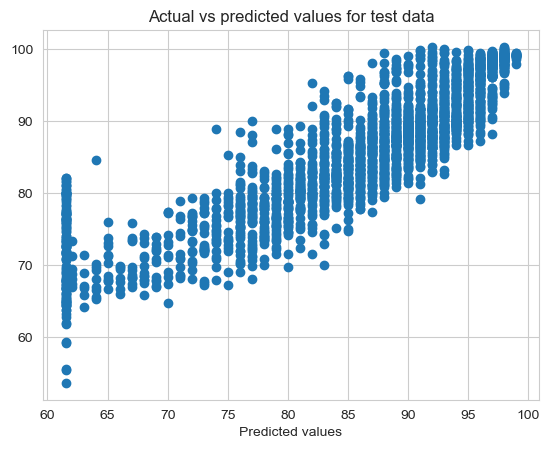

In [1299]:
LinearRegressionUsingSkLearn(comp_ot_stepwise)